In [16]:
import pandas as pd

# 파일 읽기
df = pd.read_csv("wildfire_merged.csv")

# 기본 정보 확인
print(f"행: {len(df)}, 열: {len(df.columns)}")
print("\n컬럼명:")
print(df.columns.tolist())
print("\n처음 5행:")
print(df.head())

행: 3560, 열: 61

컬럼명:
['WRINV_NO', 'FIRE_TYPE_NM', 'SMTPR_LCLSF_NM', 'SMTPR_SCLSF_NM', 'DTH_CNT', 'INJPSN_CNT', 'HNL_DAM_CNT', 'PRPT_DAM_AMT', 'DOW_NM', 'FRSTN_NM', 'CNTR_NM', 'RCPT_DT', 'DSPT_DT', 'GRNDS_ARVL_DT', 'BGNN_POTFR_DT', 'PRFECT_POTFR_DT', 'CBK_DT', 'DSPT_REQ_HR', 'FIRE_SUPESN_HR', 'CTPV_NM', 'SGG_NM', 'FRSTN_GRNDS_DSTNC', 'CNTR_GRNDS_DSTNC', 'LFDAU_GRNDS_DSTNC', 'IGTN_HTSRC_NM', 'IGTN_HTSRC_SCLSF_NM', 'IGTN_DMNT_LCLSF_NM', 'IGTN_DMNT_SCLSF_NM', 'FRST_IGOBJ_LCLSF_NM', 'FRST_IGOBJ_SCLSF_NM', 'IGTN_ISTR_LCLSF_NM', 'IGTN_ISTR_SCLSF_NM', 'CMBS_EXPOBJ_LCLSF_NM', 'CMBS_EXPOBJ_SCLSF_NM', 'FCLT_PLC_LCLSF_NM', 'FCLT_PLC_MCLSF_NM', 'FCLT_PLC_SCLSF_NM', 'SO_AREA', 'FIRE_INSRNC_OBLG_TRGT_YN', 'ARSON_MNG_TRGT_YN', 'MUB_YN', 'FND_FIRE_SE_NM', 'FND_IGTN_PSTN_NM', 'HR_UNIT_ARTMP', 'HR_UNIT_WSPD_INFO', 'WNDRCT_BRNG', 'HR_UNIT_HUM', 't2m_mean_C', 't2m_min_C', 't2m_max_C', 'd2m_mean_C', 'd2m_min_C', 'd2m_max_C', 'u10_mean_ms', 'v10_mean_ms', 'wind_speed_mean', 'wind_dir_deg', 'tp_sum_mm', 'pev_

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import platform
import warnings

# 한글 폰트 설정
if platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = ['AppleGothic', 'Malgun Gothic', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 경고 메시지 숨기기
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

# matplotlib 폰트 관련 경고 숨기기
import matplotlib.font_manager as fm

warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib.font_manager')

if platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'  # macOS 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False

In [18]:
# ... existing code ...

# datetime으로 변환할 컬럼들
datetime_columns = ['RCPT_DT', 'DSPT_DT', 'GRNDS_ARVL_DT', 'BGNN_POTFR_DT', 'PRFECT_POTFR_DT', 'CBK_DT']

# 각 컬럼을 datetime으로 변환하고 df에 덮어쓰기
for col in datetime_columns:
    df[col] = pd.to_datetime(df[col], format='%Y%m%d%H%M%S', errors='coerce')

print("=== datetime 변환 완료 ===")
print("변환된 컬럼들의 데이터 타입:")
for col in datetime_columns:
    print(f"{col}: {df[col].dtype}")

print("\n=== 변환된 데이터 샘플 ===")
print(df[datetime_columns].head())

# ... existing code ...

=== datetime 변환 완료 ===
변환된 컬럼들의 데이터 타입:
RCPT_DT: datetime64[ns]
DSPT_DT: datetime64[ns]
GRNDS_ARVL_DT: datetime64[ns]
BGNN_POTFR_DT: datetime64[ns]
PRFECT_POTFR_DT: datetime64[ns]
CBK_DT: datetime64[ns]

=== 변환된 데이터 샘플 ===
              RCPT_DT             DSPT_DT       GRNDS_ARVL_DT  \
0 2019-01-20 04:23:23 2019-01-20 04:24:54 2019-01-20 04:29:00   
1 2019-03-11 04:34:09 2019-03-11 04:34:47 2019-03-11 04:39:00   
2 2019-03-06 02:02:27 2019-03-06 02:03:00 2019-03-06 02:13:43   
3 2019-03-31 11:03:13 2019-03-31 11:04:11 2019-03-31 11:13:49   
4 2019-12-31 00:18:50 2019-12-31 00:19:22 2019-12-31 00:33:56   

        BGNN_POTFR_DT     PRFECT_POTFR_DT              CBK_DT  
0 2019-01-20 04:49:00 2019-01-20 04:49:00 2019-01-20 05:45:00  
1 2019-03-11 04:49:00 2019-03-11 04:49:00 2019-03-11 05:25:00  
2 2019-03-06 02:38:00 2019-03-06 02:38:00 2019-03-06 04:14:37  
3 2019-03-31 11:39:18 2019-03-31 11:39:18 2019-03-31 12:18:18  
4 2019-12-31 02:41:00 2019-12-31 04:35:00 2019-12-31 09:00:00  


In [19]:
# ... existing code ...

# 1. 시간 차이 계산 (초 단위)
df['arrival_time_diff'] = (df['GRNDS_ARVL_DT'] - df['RCPT_DT']).dt.total_seconds()
df['dispatch_time_diff'] = (df['DSPT_DT'] - df['RCPT_DT']).dt.total_seconds()

# 2. 골든타임 준수 여부 (50분 = 3000초 이하)
df['golden_time_under_50min'] = (df['DSPT_REQ_HR'] <= 3000).astype(int)

# 3. 야간 화재 여부 (20:00~06:59)
df['is_night'] = ((df['RCPT_DT'].dt.hour >= 20) | (df['RCPT_DT'].dt.hour < 7)).astype(int)

# 4. 월별 정보
df['month'] = df['RCPT_DT'].dt.month

print("=== 파생변수 생성 완료 ===")
print("생성된 파생변수들:")
print(f"arrival_time_diff: {df['arrival_time_diff'].dtype}")
print(f"dispatch_time_diff: {df['dispatch_time_diff'].dtype}")
print(f"golden_time_under_50min: {df['golden_time_under_50min'].dtype}")
print(f"is_night: {df['is_night'].dtype}")
print(f"month: {df['month'].dtype}")

print("\n=== 파생변수 기본 통계 ===")
print("arrival_time_diff (초):")
print(df['arrival_time_diff'].describe())

print("\ngolden_time_under_50min 분포:")
print(df['golden_time_under_50min'].value_counts())

print("\nis_night 분포:")
print(df['is_night'].value_counts())

print("\nmonth 분포:")
print(df['month'].value_counts().sort_index())

# ... existing code ...

=== 파생변수 생성 완료 ===
생성된 파생변수들:
arrival_time_diff: float64
dispatch_time_diff: float64
golden_time_under_50min: int64
is_night: int64
month: int32

=== 파생변수 기본 통계 ===
arrival_time_diff (초):
count     3560.000000
mean       832.536517
std       2165.303472
min          0.000000
25%        424.750000
50%        659.000000
75%        953.000000
max      88071.000000
Name: arrival_time_diff, dtype: float64

golden_time_under_50min 분포:
golden_time_under_50min
1    3535
0      25
Name: count, dtype: int64

is_night 분포:
is_night
0    3121
1     439
Name: count, dtype: int64

month 분포:
month
1     367
2     510
3     809
4     837
5     353
6     122
7      45
8      16
9      31
10    106
11    179
12    185
Name: count, dtype: int64


In [20]:
# ... existing code ...

# 음수 값 확인
print("=== 음수 값 확인 ===")

# arrival_time_diff 음수 값 확인
negative_arrival = df[df['arrival_time_diff'] < 0]
print(f"arrival_time_diff 음수 값 개수: {len(negative_arrival)}")
if len(negative_arrival) > 0:
    print("arrival_time_diff 음수 값들:")
    print(negative_arrival[['RCPT_DT', 'GRNDS_ARVL_DT', 'arrival_time_diff']].head())

# dispatch_time_diff 음수 값 확인  
negative_dispatch = df[df['dispatch_time_diff'] < 0]
print(f"\ndispatch_time_diff 음수 값 개수: {len(negative_dispatch)}")
if len(negative_dispatch) > 0:
    print("dispatch_time_diff 음수 값들:")
    print(negative_dispatch[['RCPT_DT', 'DSPT_DT', 'dispatch_time_diff']].head())

# 전체 통계 확인
print("\n=== 시간 차이 변수 통계 ===")
print("arrival_time_diff:")
print(df['arrival_time_diff'].describe())
print(f"최소값: {df['arrival_time_diff'].min():.2f}초")
print(f"최대값: {df['arrival_time_diff'].max():.2f}초")

print("\ndispatch_time_diff:")
print(df['dispatch_time_diff'].describe())
print(f"최소값: {df['dispatch_time_diff'].min():.2f}초")
print(f"최대값: {df['dispatch_time_diff'].max():.2f}초")

# ... existing code ...

=== 음수 값 확인 ===
arrival_time_diff 음수 값 개수: 0

dispatch_time_diff 음수 값 개수: 0

=== 시간 차이 변수 통계 ===
arrival_time_diff:
count     3560.000000
mean       832.536517
std       2165.303472
min          0.000000
25%        424.750000
50%        659.000000
75%        953.000000
max      88071.000000
Name: arrival_time_diff, dtype: float64
최소값: 0.00초
최대값: 88071.00초

dispatch_time_diff:
count    3560.000000
mean       79.888764
std       122.884099
min         0.000000
25%        46.000000
50%        62.000000
75%        92.000000
max      5798.000000
Name: dispatch_time_diff, dtype: float64
최소값: 0.00초
최대값: 5798.00초


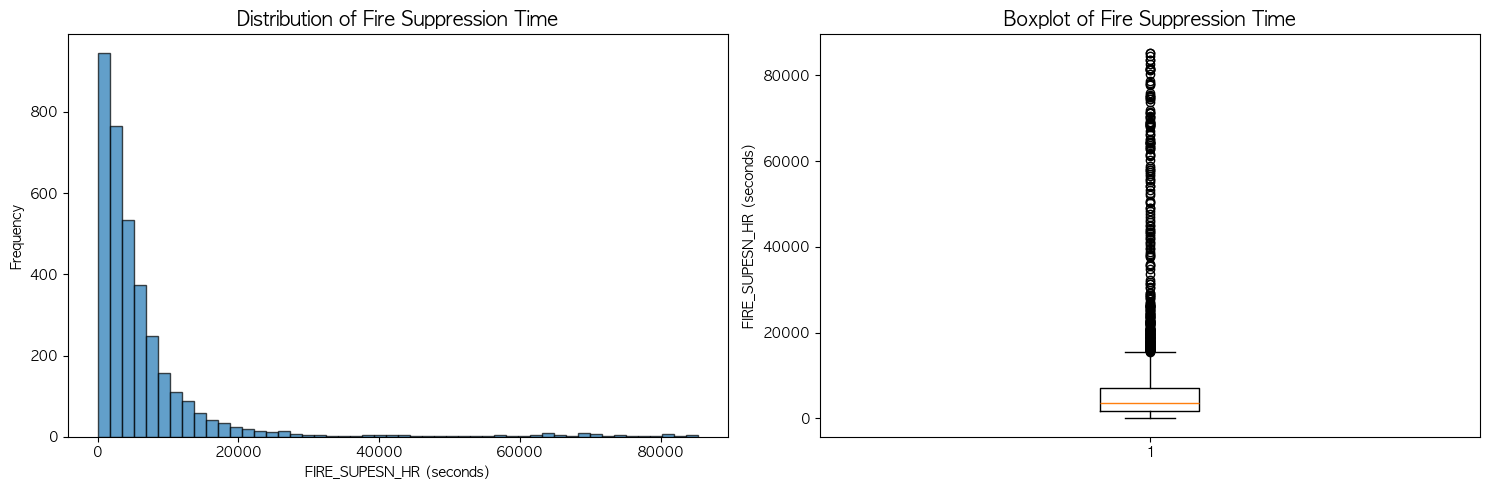

In [21]:
# 새로운 객체 생성
df_new = df.copy()

# 시각화를 위한 데이터 객체: df_new
# 시각화 대상: FIRE_SUPESN_HR (종속변수)

import matplotlib.pyplot as plt

# 종속변수 분포 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 히스토그램
ax1.hist(df_new['FIRE_SUPESN_HR'], bins=50, alpha=0.7, edgecolor='black')
ax1.set_title('Distribution of Fire Suppression Time', fontsize=14)
ax1.set_xlabel('FIRE_SUPESN_HR (seconds)')
ax1.set_ylabel('Frequency')

# 박스플롯
ax2.boxplot(df_new['FIRE_SUPESN_HR'])
ax2.set_title('Boxplot of Fire Suppression Time', fontsize=14)
ax2.set_ylabel('FIRE_SUPESN_HR (seconds)')

plt.tight_layout()
plt.show()

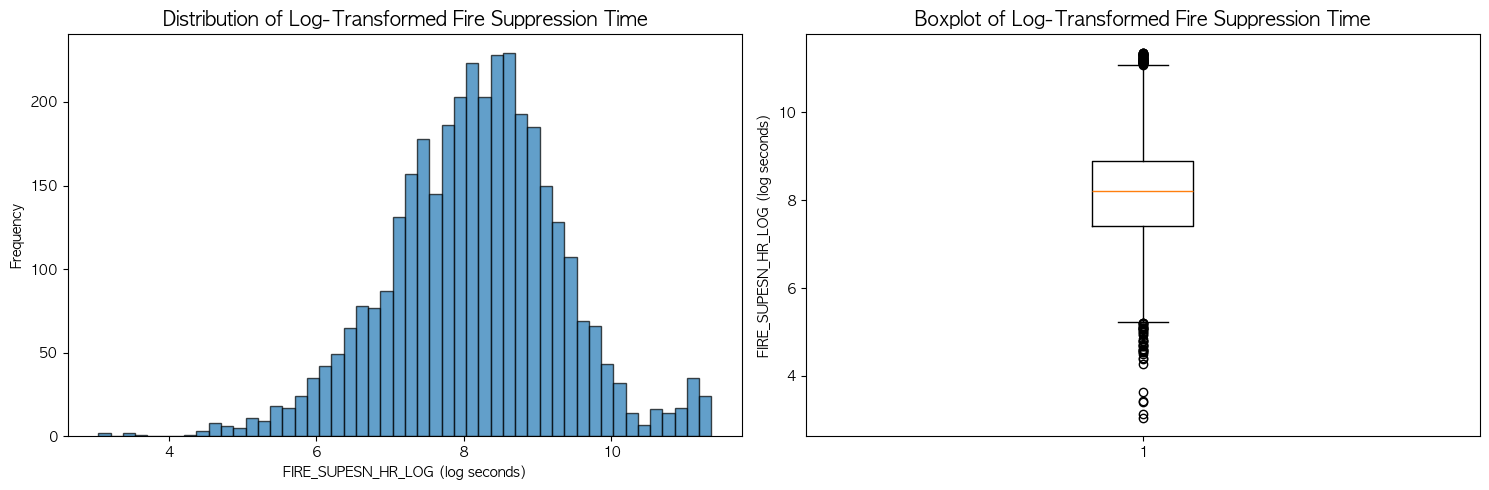

In [22]:
# 로그화된 새로운 객체 생성 (0보다 큰 값만 선택)
df_log = df[df['FIRE_SUPESN_HR'] > 0].copy()
df_log['FIRE_SUPESN_HR_LOG'] = np.log(df_log['FIRE_SUPESN_HR'])

# 시각화를 위한 데이터 객체: df_log
# 시각화 대상: FIRE_SUPESN_HR_LOG (로그화된 종속변수)

import matplotlib.pyplot as plt

# 로그화된 종속변수 분포 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 히스토그램
ax1.hist(df_log['FIRE_SUPESN_HR_LOG'], bins=50, alpha=0.7, edgecolor='black')
ax1.set_title('Distribution of Log-Transformed Fire Suppression Time', fontsize=14)
ax1.set_xlabel('FIRE_SUPESN_HR_LOG (log seconds)')
ax1.set_ylabel('Frequency')

# 박스플롯
ax2.boxplot(df_log['FIRE_SUPESN_HR_LOG'])
ax2.set_title('Boxplot of Log-Transformed Fire Suppression Time', fontsize=14)
ax2.set_ylabel('FIRE_SUPESN_HR_LOG (log seconds)')

plt.tight_layout()
plt.show()

=== 데이터 정보 ===
분석 대상 행 수: 3560
분석 대상 변수: ['DSPT_REQ_HR', 'FRSTN_GRNDS_DSTNC', 'CNTR_GRNDS_DSTNC', 'HR_UNIT_ARTMP', 'HR_UNIT_HUM', 'arrival_time_diff', 'dispatch_time_diff']
종속변수: FIRE_SUPESN_HR

=== 상관계수 ===
CNTR_GRNDS_DSTNC      0.131594
FRSTN_GRNDS_DSTNC     0.124489
DSPT_REQ_HR           0.099829
dispatch_time_diff    0.036636
HR_UNIT_ARTMP         0.025666
arrival_time_diff     0.019992
HR_UNIT_HUM          -0.032818
Name: FIRE_SUPESN_HR, dtype: float64


IndexError: index 2 is out of bounds for axis 0 with size 2

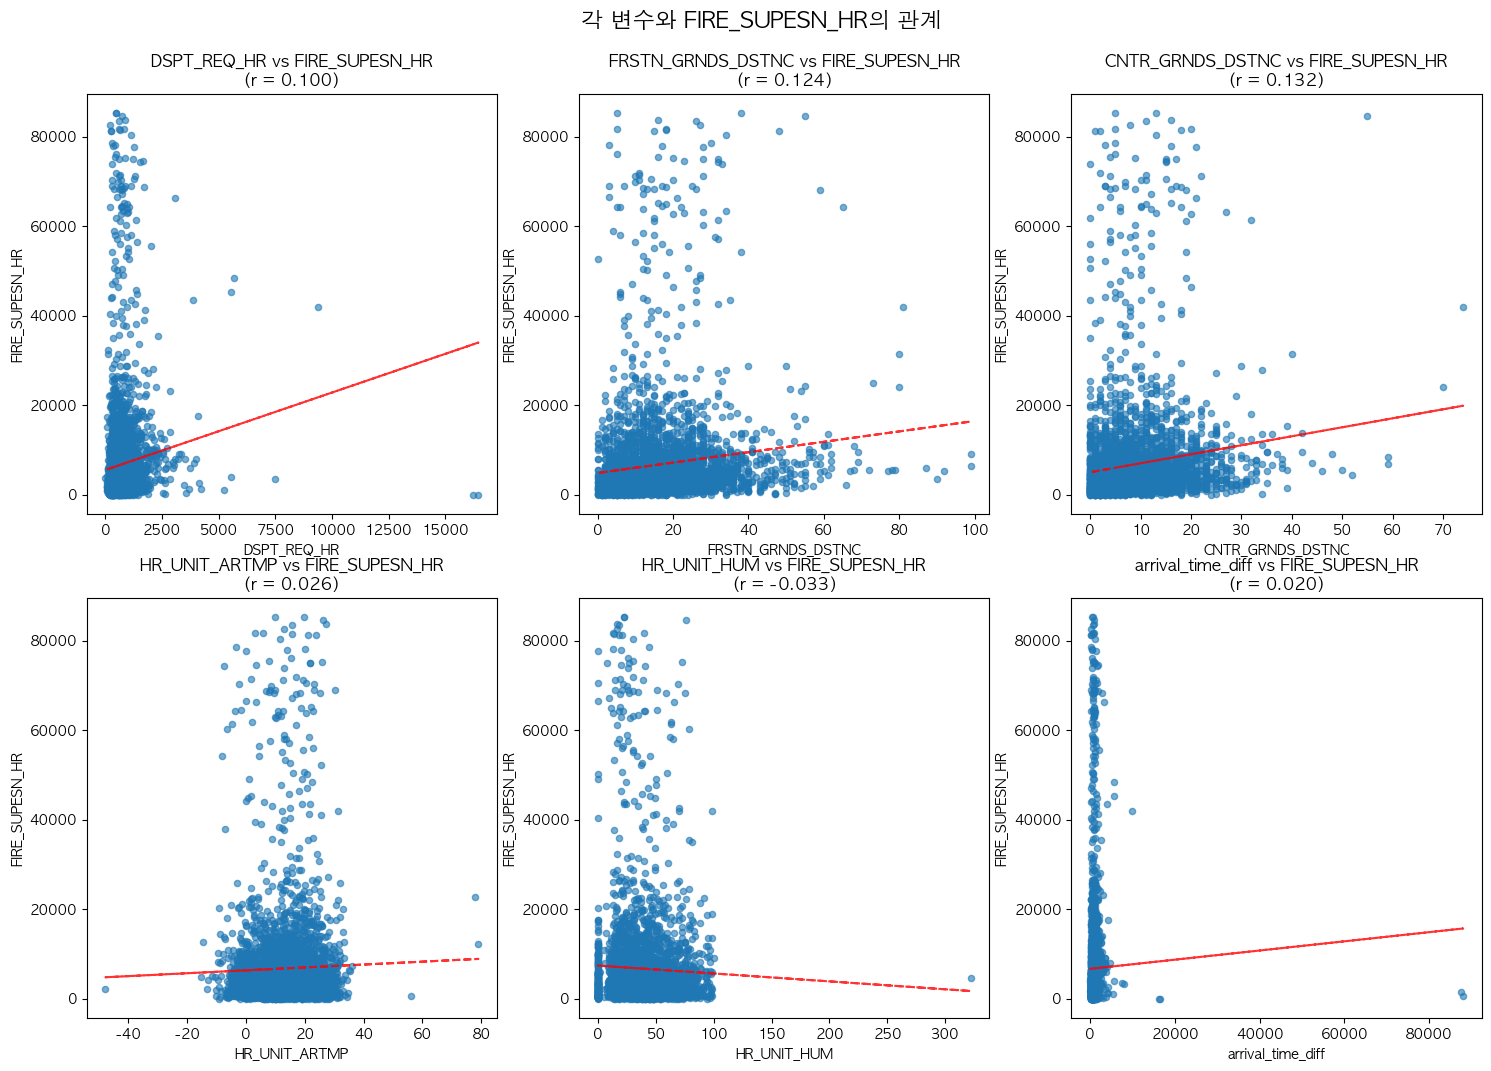

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 분석 대상 변수들
target_vars = ['DSPT_REQ_HR', 'FRSTN_GRNDS_DSTNC', 'CNTR_GRNDS_DSTNC', 'HR_UNIT_ARTMP', 'HR_UNIT_HUM', 'arrival_time_diff', 'dispatch_time_diff']
dependent_var = 'FIRE_SUPESN_HR'

# 결측값이 있는 행 제거
df_clean = df[target_vars + [dependent_var]].dropna()

print("=== 데이터 정보 ===")
print(f"분석 대상 행 수: {len(df_clean)}")
print(f"분석 대상 변수: {target_vars}")
print(f"종속변수: {dependent_var}")

# 1. 상관계수 계산
print("\n=== 상관계수 ===")
correlation_matrix = df_clean.corr()
print(correlation_matrix[dependent_var][target_vars].sort_values(ascending=False))

# 2. 산점도와 회귀선
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle(f'각 변수와 {dependent_var}의 관계', fontsize=16, y=0.95)

for i, var in enumerate(target_vars):
    row = i // 3
    col = i % 3
    
    # 산점도
    axes[row, col].scatter(df_clean[var], df_clean[dependent_var], alpha=0.6, s=20)
    
    # 회귀선 추가
    z = np.polyfit(df_clean[var], df_clean[dependent_var], 1)
    p = np.poly1d(z)
    axes[row, col].plot(df_clean[var], p(df_clean[var]), "r--", alpha=0.8)
    
    # 상관계수 표시
    corr = df_clean[var].corr(df_clean[dependent_var])
    axes[row, col].set_title(f'{var} vs {dependent_var}\n(r = {corr:.3f})')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel(dependent_var)

# 마지막 subplot은 히트맵으로 상관계수 표시
axes[1, 2].remove()
ax_heatmap = fig.add_subplot(2, 3, 6)
sns.heatmap(correlation_matrix[target_vars + [dependent_var]], 
            annot=True, cmap='RdBu_r', center=0, 
            square=True, ax=ax_heatmap)
ax_heatmap.set_title('상관계수 히트맵')

plt.tight_layout()
plt.show()

# 3. 상세한 통계 정보
print("\n=== 각 변수별 상세 통계 ===")
for var in target_vars:
    print(f"\n{var}:")
    print(f"  상관계수: {df_clean[var].corr(df_clean[dependent_var]):.4f}")
    print(f"  평균: {df_clean[var].mean():.2f}")
    print(f"  표준편차: {df_clean[var].std():.2f}")
    print(f"  최소값: {df_clean[var].min():.2f}")
    print(f"  최대값: {df_clean[var].max():.2f}")

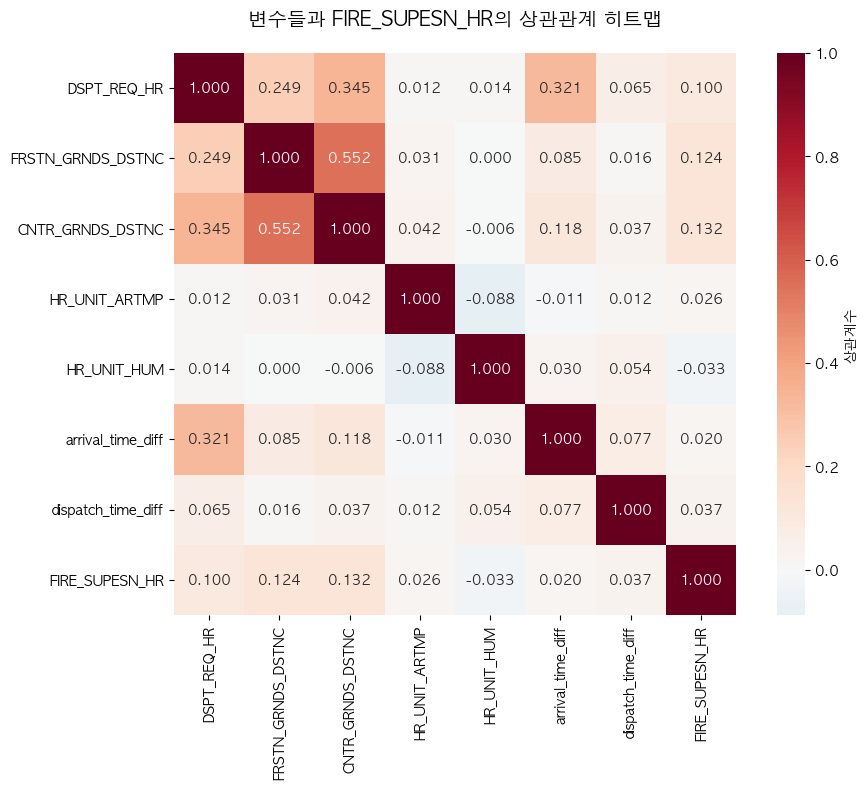

In [25]:
# ... existing code ...

# 히트맵만 따로 표시
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[target_vars + [dependent_var]], 
            annot=True,           # 상관계수 값 표시
            cmap='RdBu_r',        # 빨강-파랑 색상맵 (빨강: 양의 상관, 파랑: 음의 상관)
            center=0,              # 0을 중심으로 색상 구분
            square=True,           # 정사각형 형태
            fmt='.3f',            # 소수점 3자리까지 표시
            cbar_kws={'label': '상관계수'})

plt.title(f'변수들과 {dependent_var}의 상관관계 히트맵', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# ... existing code ...

In [24]:
# ... existing code ...

# 데이터타입 확인할 변수들
check_vars = ['land_area', 'forest_area', 'forest_ratio', 'growing_stock', 'avg_growing_stock', 
              'impute_radius', 'total_time', 'arrival_time_diff', 'dispatch_time_diff', 
              'golden_time_under_50min', 'is_night', 'month', 'relax_diff']

print("=== 변수별 데이터타입 확인 ===")
for var in check_vars:
    if var in df.columns:
        print(f"{var}: {df[var].dtype}")
    else:
        print(f"{var}: 컬럼에 존재하지 않음")

print("\n=== 전체 컬럼 확인 ===")
print(f"df의 총 컬럼 수: {len(df.columns)}")
print("df의 컬럼명들:")
print(df.columns.tolist())

# ... existing code ...

=== 변수별 데이터타입 확인 ===
land_area: 컬럼에 존재하지 않음
forest_area: 컬럼에 존재하지 않음
forest_ratio: 컬럼에 존재하지 않음
growing_stock: 컬럼에 존재하지 않음
avg_growing_stock: 컬럼에 존재하지 않음
impute_radius: 컬럼에 존재하지 않음
total_time: 컬럼에 존재하지 않음
arrival_time_diff: float64
dispatch_time_diff: float64
golden_time_under_50min: int64
is_night: int64
month: int32
relax_diff: 컬럼에 존재하지 않음

=== 전체 컬럼 확인 ===
df의 총 컬럼 수: 66
df의 컬럼명들:
['WRINV_NO', 'FIRE_TYPE_NM', 'SMTPR_LCLSF_NM', 'SMTPR_SCLSF_NM', 'DTH_CNT', 'INJPSN_CNT', 'HNL_DAM_CNT', 'PRPT_DAM_AMT', 'DOW_NM', 'FRSTN_NM', 'CNTR_NM', 'RCPT_DT', 'DSPT_DT', 'GRNDS_ARVL_DT', 'BGNN_POTFR_DT', 'PRFECT_POTFR_DT', 'CBK_DT', 'DSPT_REQ_HR', 'FIRE_SUPESN_HR', 'CTPV_NM', 'SGG_NM', 'FRSTN_GRNDS_DSTNC', 'CNTR_GRNDS_DSTNC', 'LFDAU_GRNDS_DSTNC', 'IGTN_HTSRC_NM', 'IGTN_HTSRC_SCLSF_NM', 'IGTN_DMNT_LCLSF_NM', 'IGTN_DMNT_SCLSF_NM', 'FRST_IGOBJ_LCLSF_NM', 'FRST_IGOBJ_SCLSF_NM', 'IGTN_ISTR_LCLSF_NM', 'IGTN_ISTR_SCLSF_NM', 'CMBS_EXPOBJ_LCLSF_NM', 'CMBS_EXPOBJ_SCLSF_NM', 'FCLT_PLC_LCLSF_NM', 'FCLT_PLC_MCLSF_

In [26]:
# ... existing code ...

# 확인할 컬럼들
weather_forest_vars = ['t2m_mean_C', 't2m_min_C', 't2m_max_C', 'd2m_mean_C', 'd2m_min_C', 'd2m_max_C',
                       'u10_mean_ms', 'v10_mean_ms', 'wind_speed_mean', 'wind_dir_deg', 'tp_sum_mm', 
                       'pev_sum_mm', 'ssrd_sum_Jm2', 'ssrd_sum_MJm2', 'land_area', 'forest_area', 
                       'forest_ratio', 'growing_stock', 'avg_growing_stock']

print("=== 컬럼 존재 여부 확인 ===")
existing_vars = []
missing_vars = []

for var in weather_forest_vars:
    if var in df.columns:
        existing_vars.append(var)
        print(f"✓ {var}: {df[var].dtype}")
    else:
        missing_vars.append(var)
        print(f"✗ {var}: 존재하지 않음")

print(f"\n=== 요약 ===")
print(f"존재하는 컬럼: {len(existing_vars)}개")
print(f"존재하지 않는 컬럼: {len(missing_vars)}개")

if existing_vars:
    print(f"\n존재하는 컬럼들: {existing_vars}")
if missing_vars:
    print(f"존재하지 않는 컬럼들: {missing_vars}")

# ... existing code ...

=== 컬럼 존재 여부 확인 ===
✓ t2m_mean_C: float64
✓ t2m_min_C: float64
✓ t2m_max_C: float64
✓ d2m_mean_C: float64
✓ d2m_min_C: float64
✓ d2m_max_C: float64
✓ u10_mean_ms: float64
✓ v10_mean_ms: float64
✓ wind_speed_mean: float64
✓ wind_dir_deg: float64
✓ tp_sum_mm: float64
✓ pev_sum_mm: float64
✓ ssrd_sum_Jm2: float64
✓ ssrd_sum_MJm2: float64
✗ land_area: 존재하지 않음
✗ forest_area: 존재하지 않음
✗ forest_ratio: 존재하지 않음
✗ growing_stock: 존재하지 않음
✗ avg_growing_stock: 존재하지 않음

=== 요약 ===
존재하는 컬럼: 14개
존재하지 않는 컬럼: 5개

존재하는 컬럼들: ['t2m_mean_C', 't2m_min_C', 't2m_max_C', 'd2m_mean_C', 'd2m_min_C', 'd2m_max_C', 'u10_mean_ms', 'v10_mean_ms', 'wind_speed_mean', 'wind_dir_deg', 'tp_sum_mm', 'pev_sum_mm', 'ssrd_sum_Jm2', 'ssrd_sum_MJm2']
존재하지 않는 컬럼들: ['land_area', 'forest_area', 'forest_ratio', 'growing_stock', 'avg_growing_stock']


=== 분석 대상 변수 ===
기상/산림 변수: ['t2m_mean_C', 't2m_min_C', 't2m_max_C', 'd2m_mean_C', 'd2m_min_C', 'd2m_max_C', 'u10_mean_ms', 'v10_mean_ms', 'wind_speed_mean', 'wind_dir_deg', 'tp_sum_mm', 'pev_sum_mm', 'ssrd_sum_Jm2', 'ssrd_sum_MJm2']
종속변수: FIRE_SUPESN_HR

분석 대상 행 수: 3329

=== 상관계수 ===
wind_speed_mean    0.092529
u10_mean_ms        0.063538
v10_mean_ms        0.039610
ssrd_sum_MJm2      0.031430
ssrd_sum_Jm2       0.031430
t2m_max_C          0.026629
t2m_mean_C         0.018599
t2m_min_C          0.014402
wind_dir_deg       0.005443
d2m_max_C          0.002108
d2m_mean_C        -0.010759
tp_sum_mm         -0.012079
d2m_min_C         -0.020429
pev_sum_mm        -0.104318
Name: FIRE_SUPESN_HR, dtype: float64


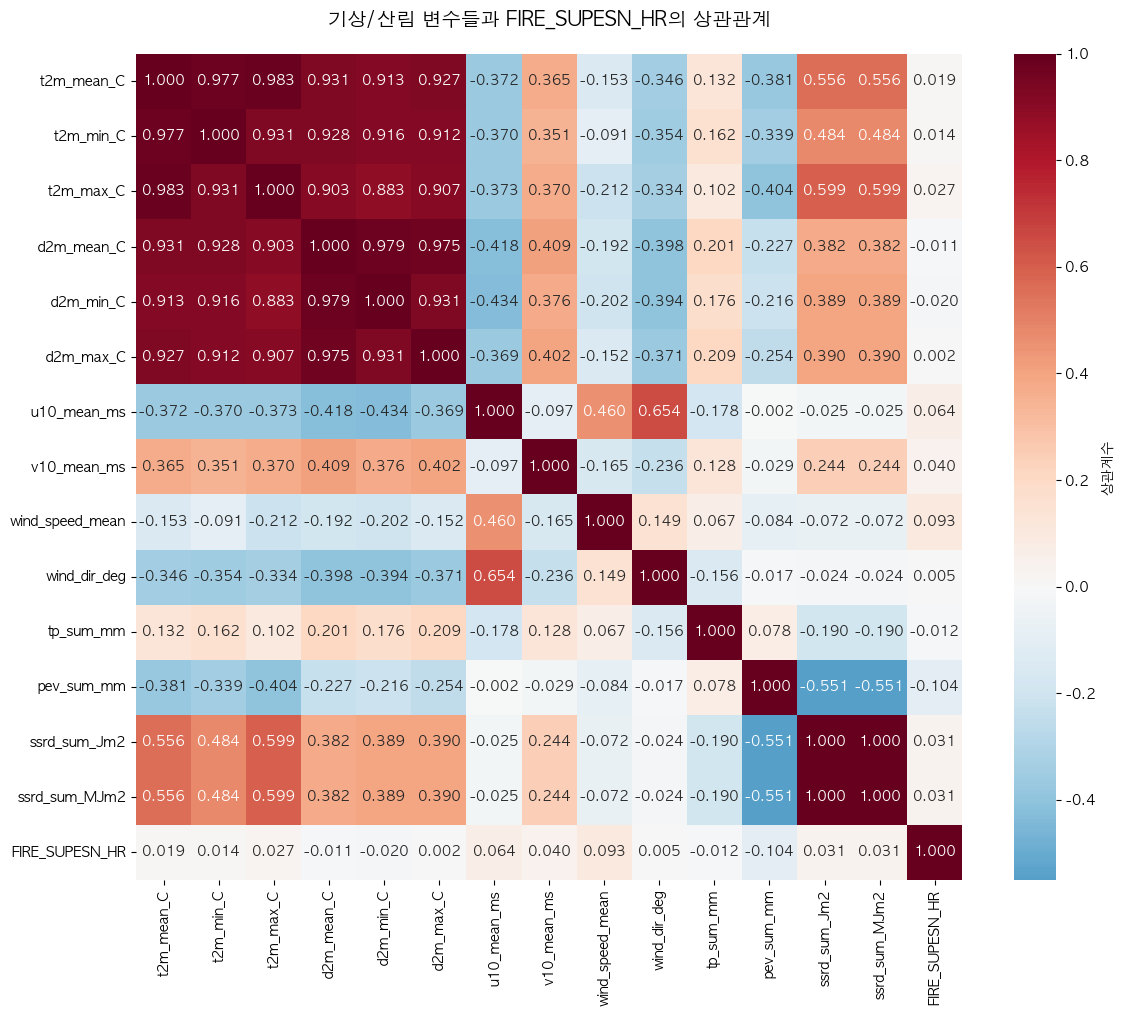


=== 각 변수별 상세 통계 ===

t2m_mean_C:
  상관계수: 0.0186
  평균: 8.67
  표준편차: 7.27
  최소값: -12.42
  최대값: 28.34

t2m_min_C:
  상관계수: 0.0144
  평균: 4.02
  표준편차: 6.99
  최소값: -16.97
  최대값: 26.51

t2m_max_C:
  상관계수: 0.0266
  평균: 14.11
  표준편차: 7.79
  최소값: -8.48
  최대값: 33.98

d2m_mean_C:
  상관계수: -0.0108
  평균: 0.39
  표준편차: 8.27
  최소값: -28.78
  최대값: 25.09

d2m_min_C:
  상관계수: -0.0204
  평균: -2.75
  표준편차: 8.92
  최소값: -31.97
  최대값: 24.30

d2m_max_C:
  상관계수: 0.0021
  평균: 3.48
  표준편차: 7.87
  최소값: -26.30
  최대값: 25.99

u10_mean_ms:
  상관계수: 0.0635
  평균: 1.00
  표준편차: 1.69
  최소값: -8.14
  최대값: 7.44

v10_mean_ms:
  상관계수: 0.0396
  평균: -0.13
  표준편차: 1.48
  최소값: -6.72
  최대값: 6.92

wind_speed_mean:
  상관계수: 0.0925
  평균: 2.08
  표준편차: 1.32
  최소값: 0.06
  최대값: 9.31

wind_dir_deg:
  상관계수: 0.0054
  평균: 229.45
  표준편차: 88.67
  최소값: 0.10
  최대값: 359.49

tp_sum_mm:
  상관계수: -0.0121
  평균: 6.40
  표준편차: 30.05
  최소값: 0.00
  최대값: 671.87

pev_sum_mm:
  상관계수: -0.1043
  평균: -146.27
  표준편차: 89.37
  최소값: -685.01
  최대값: -3.98

ssrd_sum_Jm2:
  상관계수

In [27]:
# ... existing code ...

# 존재하는 컬럼들만 필터링
existing_weather_forest = [var for var in weather_forest_vars if var in df.columns]
dependent_var = 'FIRE_SUPESN_HR'

print("=== 분석 대상 변수 ===")
print(f"기상/산림 변수: {existing_weather_forest}")
print(f"종속변수: {dependent_var}")

# 결측값이 있는 행 제거
df_weather_clean = df[existing_weather_forest + [dependent_var]].dropna()
print(f"\n분석 대상 행 수: {len(df_weather_clean)}")

# 1. 상관계수 계산
print("\n=== 상관계수 ===")
correlation_matrix = df_weather_clean.corr()
print(correlation_matrix[dependent_var][existing_weather_forest].sort_values(ascending=False))

# 2. 히트맵
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[existing_weather_forest + [dependent_var]], 
            annot=True,           # 상관계수 값 표시
            cmap='RdBu_r',        # 빨강-파랑 색상맵
            center=0,              # 0을 중심으로 색상 구분
            square=True,           # 정사각형 형태
            fmt='.3f',            # 소수점 3자리까지 표시
            cbar_kws={'label': '상관계수'})

plt.title(f'기상/산림 변수들과 {dependent_var}의 상관관계', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# 3. 상세한 통계 정보
print("\n=== 각 변수별 상세 통계 ===")
for var in existing_weather_forest:
    print(f"\n{var}:")
    print(f"  상관계수: {df_weather_clean[var].corr(df_weather_clean[dependent_var]):.4f}")
    print(f"  평균: {df_weather_clean[var].mean():.2f}")
    print(f"  표준편차: {df_weather_clean[var].std():.2f}")
    print(f"  최소값: {df_weather_clean[var].min():.2f}")
    print(f"  최대값: {df_weather_clean[var].max():.2f}")

# ... existing code ...

In [28]:
# ... existing code ...

# 확인할 컬럼들
check_vars = ['HR_UNIT_ARTMP', 'HR_UNIT_WSPD_INFO', 'WNDRCT_BRNG', 'HR_UNIT_HUM']

print("=== 컬럼 존재 여부 확인 ===")
existing_vars = []
missing_vars = []

for var in check_vars:
    if var in df.columns:
        existing_vars.append(var)
        print(f"✓ {var}: {df[var].dtype}")
    else:
        missing_vars.append(var)
        print(f"✗ {var}: 존재하지 않음")

print(f"\n=== 요약 ===")
print(f"존재하는 컬럼: {len(existing_vars)}개")
print(f"존재하지 않는 컬럼: {len(missing_vars)}개")

if existing_vars:
    print(f"\n존재하는 컬럼들: {existing_vars}")
if missing_vars:
    print(f"존재하지 않는 컬럼들: {missing_vars}")

# ... existing code ...

=== 컬럼 존재 여부 확인 ===
✓ HR_UNIT_ARTMP: float64
✓ HR_UNIT_WSPD_INFO: object
✓ WNDRCT_BRNG: object
✓ HR_UNIT_HUM: float64

=== 요약 ===
존재하는 컬럼: 4개
존재하지 않는 컬럼: 0개

존재하는 컬럼들: ['HR_UNIT_ARTMP', 'HR_UNIT_WSPD_INFO', 'WNDRCT_BRNG', 'HR_UNIT_HUM']


=== 데이터 타입별 컬럼 분류 ===
float64 타입: 21개
object 타입: 28개

=== float64 컬럼 분포 시각화 ===


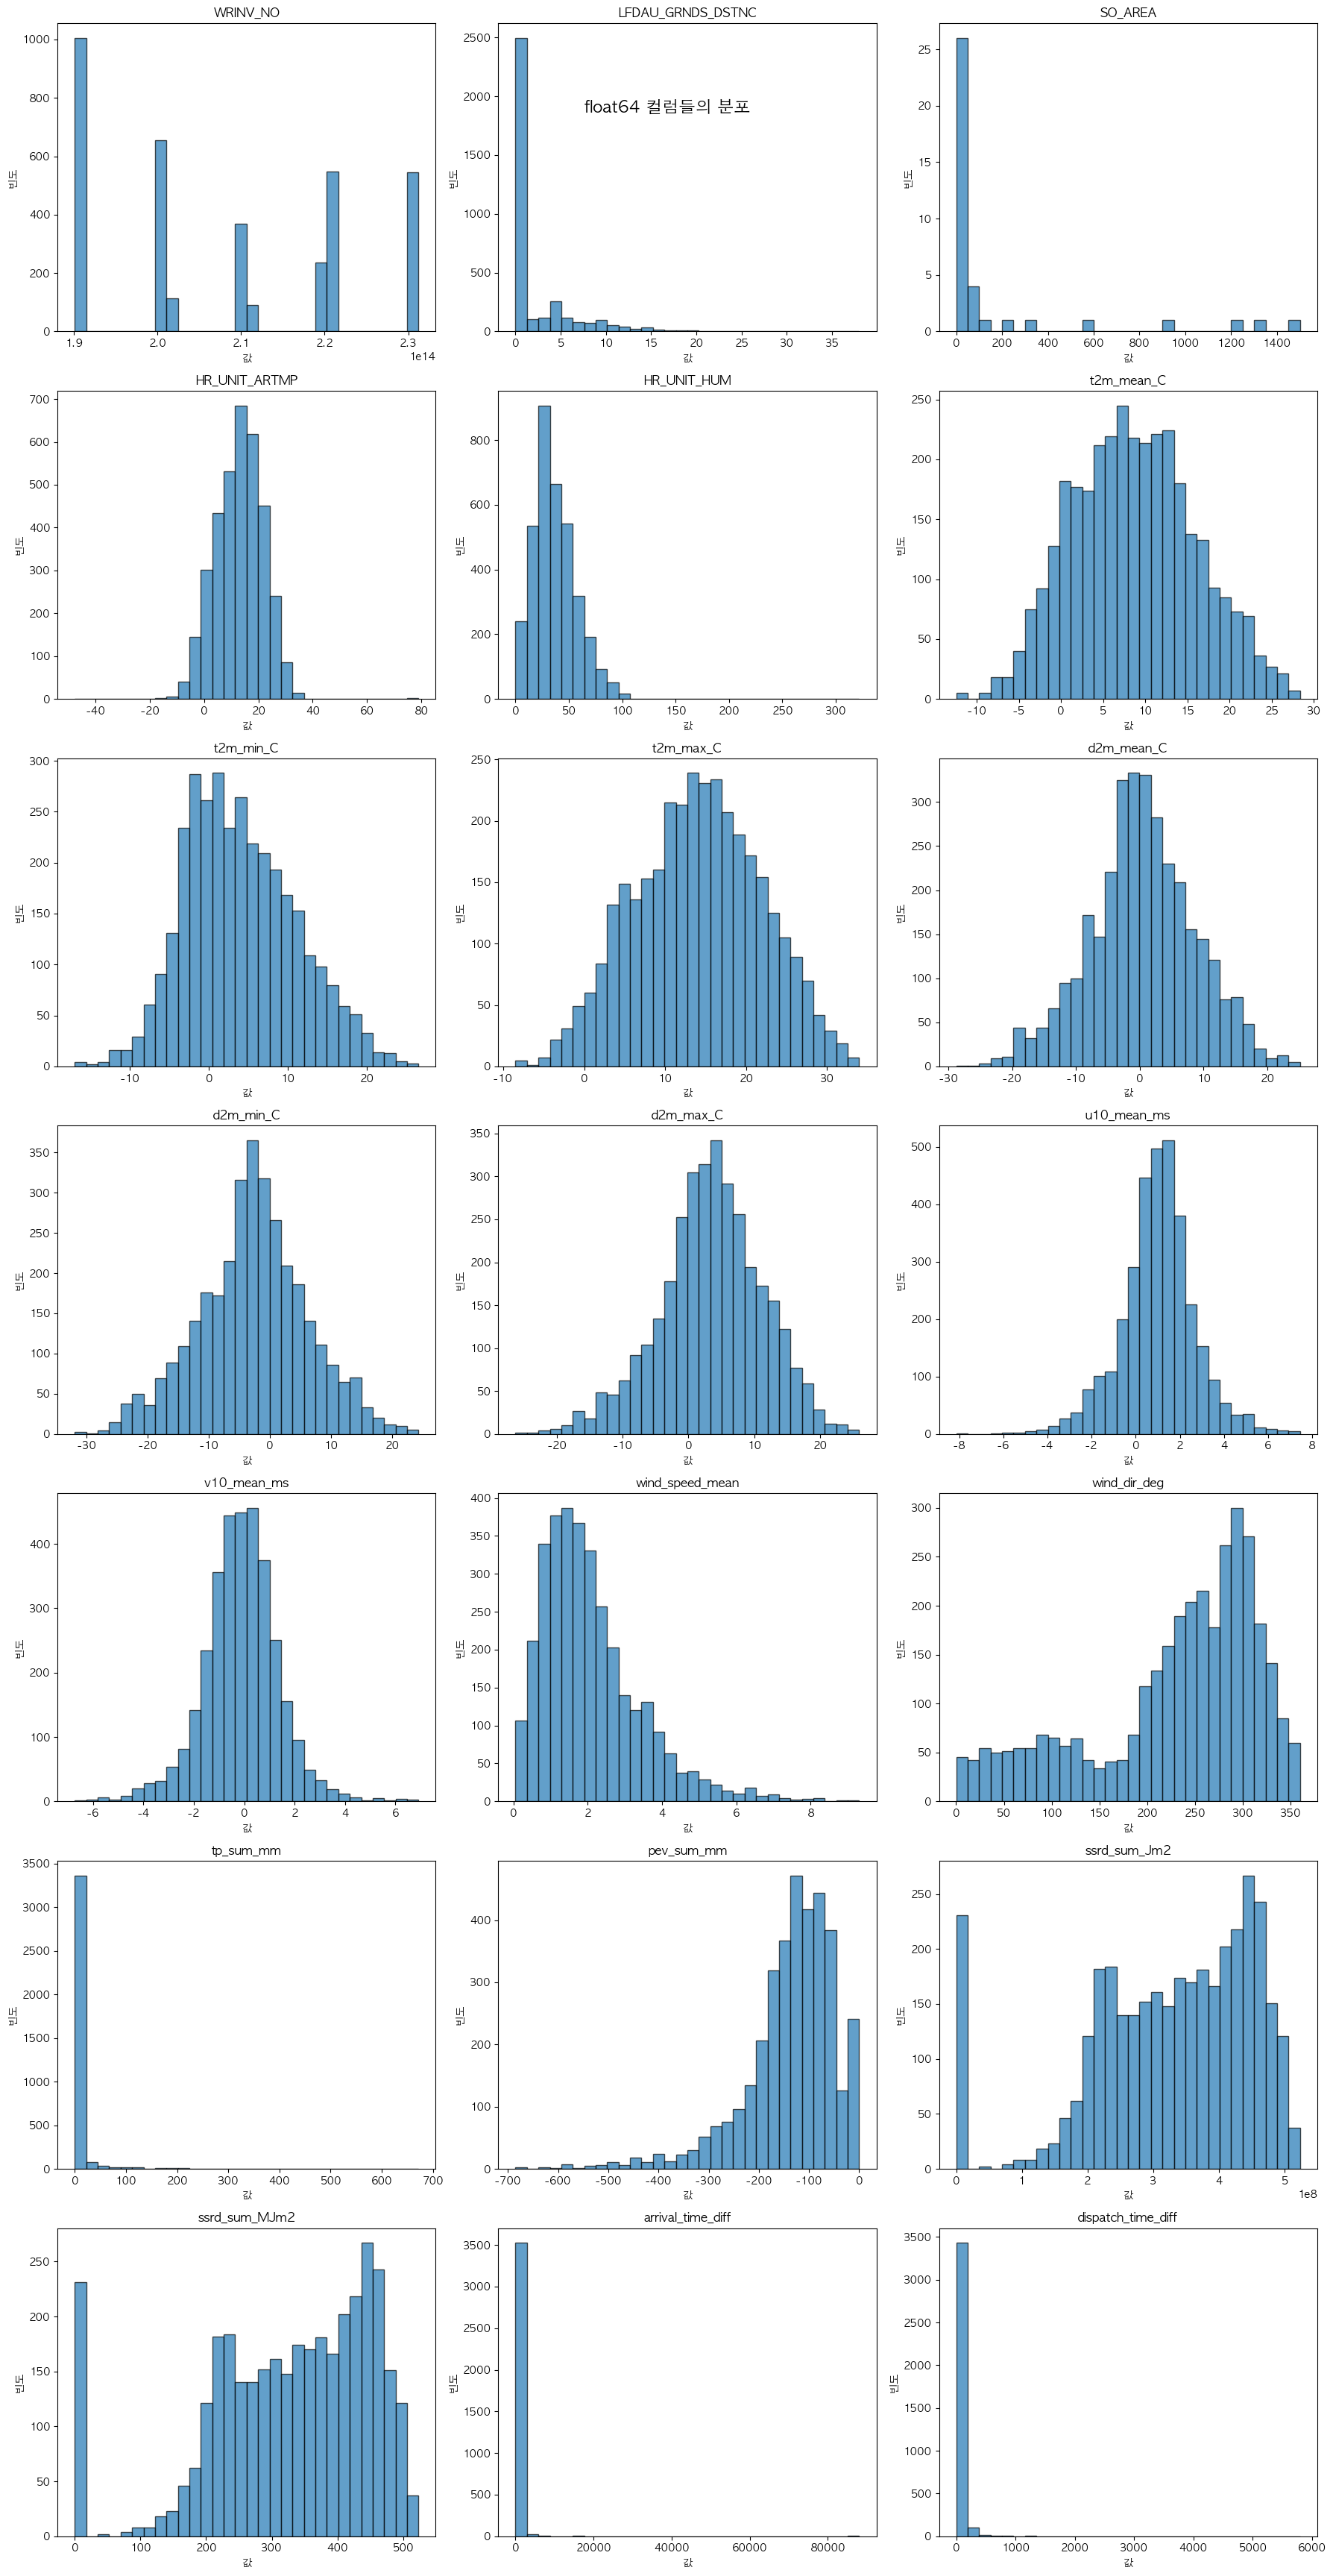


=== object 컬럼 도넛 차트 ===


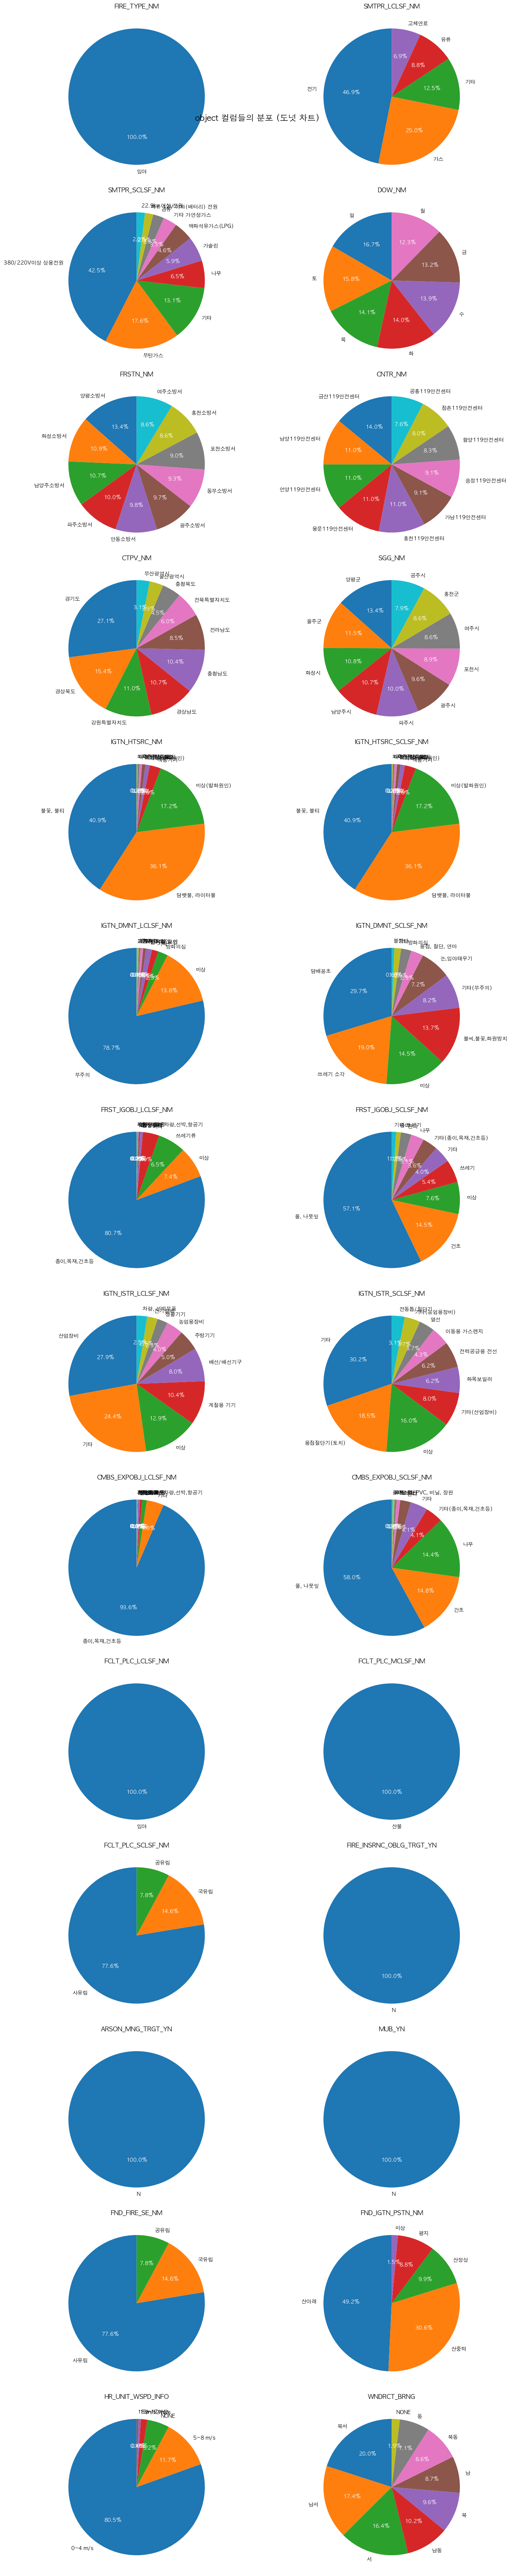

In [29]:
# ... existing code ...

# 데이터 타입별로 컬럼 분류
float64_cols = df.select_dtypes(include=['float64']).columns.tolist()
object_cols = df.select_dtypes(include=['object']).columns.tolist()

print("=== 데이터 타입별 컬럼 분류 ===")
print(f"float64 타입: {len(float64_cols)}개")
print(f"object 타입: {len(object_cols)}개")

# 1. float64 컬럼들의 분포 (히스토그램)
if float64_cols:
    print(f"\n=== float64 컬럼 분포 시각화 ===")
    
    # float64 컬럼이 많을 경우를 고려해서 subplot 크기 조정
    n_cols = 3
    n_rows = (len(float64_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    fig.suptitle('float64 컬럼들의 분포', fontsize=16, y=0.95)
    
    # 1차원 배열인 경우 2차원으로 변환
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    for i, col in enumerate(float64_cols):
        row = i // n_cols
        col_idx = i % n_cols
        
        # 히스토그램
        axes[row, col_idx].hist(df[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
        axes[row, col_idx].set_title(f'{col}', fontsize=12)
        axes[row, col_idx].set_xlabel('값')
        axes[row, col_idx].set_ylabel('빈도')
    
    # 빈 subplot 숨기기
    for i in range(len(float64_cols), n_rows * n_cols):
        row = i // n_cols
        col_idx = i % n_cols
        axes[row, col_idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# 2. object 컬럼들의 도넛 차트
if object_cols:
    print(f"\n=== object 컬럼 도넛 차트 ===")
    
    # object 컬럼이 많을 경우를 고려해서 subplot 크기 조정
    n_cols = 2
    n_rows = (len(object_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    fig.suptitle('object 컬럼들의 분포 (도넛 차트)', fontsize=16, y=0.95)
    
    # 1차원 배열인 경우 2차원으로 변환
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    for i, col in enumerate(object_cols):
        row = i // n_cols
        col_idx = i % n_cols
        
        # 값 개수 계산 (상위 10개만)
        value_counts = df[col].value_counts().head(10)
        
        if len(value_counts) > 0:
            # 도넛 차트
            wedges, texts, autotexts = axes[row, col_idx].pie(value_counts.values, 
                                                             labels=value_counts.index, 
                                                             autopct='%1.1f%%',
                                                             startangle=90)
            axes[row, col_idx].set_title(f'{col}', fontsize=12)
            
            # 텍스트 가독성 향상
            for autotext in autotexts:
                autotext.set_color('white')
                autotext.set_fontweight('bold')
        else:
            axes[row, col_idx].text(0.5, 0.5, '데이터 없음', ha='center', va='center')
            axes[row, col_idx].set_title(f'{col}', fontsize=12)
    
    # 빈 subplot 숨기기
    for i in range(len(object_cols), n_rows * n_cols):
        row = i // n_cols
        col_idx = i % n_cols
        axes[row, col_idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# ... existing code ...

=== 4개 컬럼 정보 분석 ===
HR_UNIT_ARTMP: float64
HR_UNIT_WSPD_INFO: object
WNDRCT_BRNG: object
HR_UNIT_HUM: float64

=== float64 컬럼 분석 ===

HR_UNIT_ARTMP:
  평균: 12.99
  표준편차: 8.79
  최소값: -47.70
  최대값: 79.00

HR_UNIT_HUM:
  평균: 36.70
  표준편차: 20.59
  최소값: 0.00
  최대값: 322.00


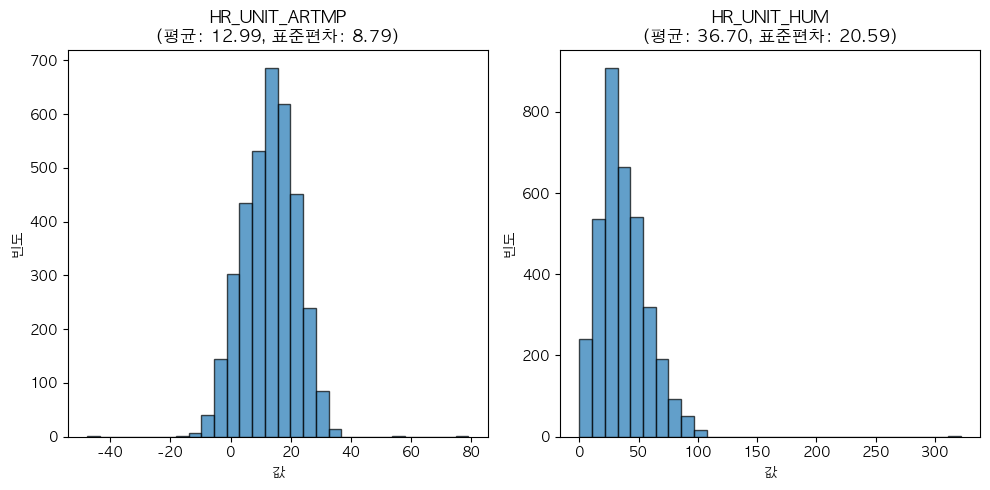


=== object 컬럼 분석 ===

HR_UNIT_WSPD_INFO 분포:
HR_UNIT_WSPD_INFO
0~4 m/s      2865
5~8 m/s       418
NONE          186
9~12 m/s       56
13~17 m/s      21
18 m/s 이상      14
Name: count, dtype: int64

WNDRCT_BRNG 분포:
WNDRCT_BRNG
북서      713
남서      621
서       584
남동      363
북       341
남       309
북동      307
동       254
NONE     68
Name: count, dtype: int64


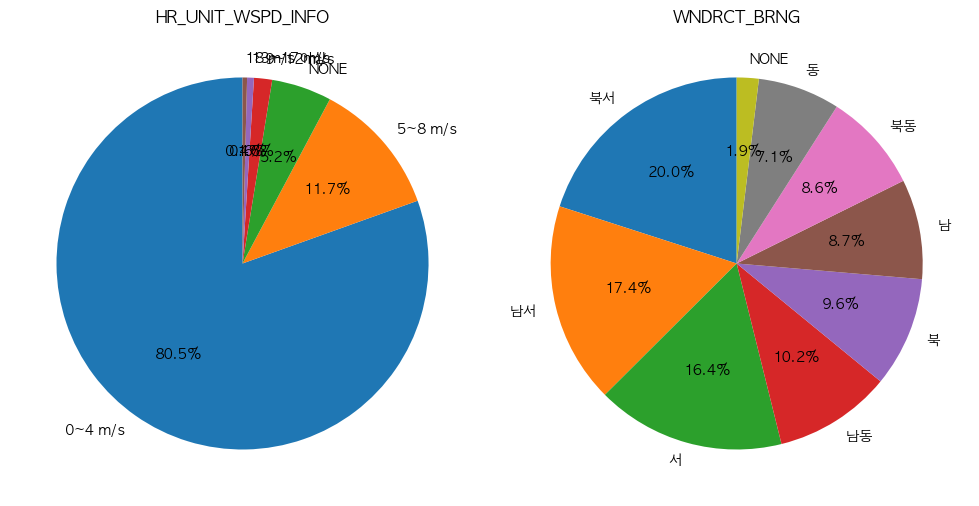

In [30]:
# ... existing code ...

# 분석할 4개 컬럼
target_cols = ['HR_UNIT_ARTMP', 'HR_UNIT_WSPD_INFO', 'WNDRCT_BRNG', 'HR_UNIT_HUM']

print("=== 4개 컬럼 정보 분석 ===")

# 데이터 타입별로 분류
float64_cols = []
object_cols = []

for col in target_cols:
    if col in df.columns:
        if df[col].dtype == 'float64':
            float64_cols.append(col)
        elif df[col].dtype == 'object':
            object_cols.append(col)
        print(f"{col}: {df[col].dtype}")
    else:
        print(f"{col}: 컬럼에 존재하지 않음")

# 1. float64 컬럼들의 분포와 통계
if float64_cols:
    print(f"\n=== float64 컬럼 분석 ===")
    
    fig, axes = plt.subplots(1, len(float64_cols), figsize=(5*len(float64_cols), 5))
    if len(float64_cols) == 1:
        axes = [axes]
    
    for i, col in enumerate(float64_cols):
        # 통계 정보
        mean_val = df[col].mean()
        std_val = df[col].std()
        print(f"\n{col}:")
        print(f"  평균: {mean_val:.2f}")
        print(f"  표준편차: {std_val:.2f}")
        print(f"  최소값: {df[col].min():.2f}")
        print(f"  최대값: {df[col].max():.2f}")
        
        # 히스토그램
        axes[i].hist(df[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
        axes[i].set_title(f'{col}\n(평균: {mean_val:.2f}, 표준편차: {std_val:.2f})', fontsize=12)
        axes[i].set_xlabel('값')
        axes[i].set_ylabel('빈도')
    
    plt.tight_layout()
    plt.show()

# 2. object 컬럼들의 파이차트
if object_cols:
    print(f"\n=== object 컬럼 분석 ===")
    
    fig, axes = plt.subplots(1, len(object_cols), figsize=(5*len(object_cols), 5))
    if len(object_cols) == 1:
        axes = [axes]
    
    for i, col in enumerate(object_cols):
        # 값 개수 계산
        value_counts = df[col].value_counts()
        print(f"\n{col} 분포:")
        print(value_counts)
        
        # 파이차트
        axes[i].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
        axes[i].set_title(f'{col}', fontsize=12)
    
    plt.tight_layout()
    plt.show()

# ... existing code ...

=== 기상 데이터 컬럼 분석 ===
분석 대상 컬럼: 14개

=== 기본 통계 정보 ===

t2m_mean_C:
  평균: 8.67
  표준편차: 7.27
  최소값: -12.42
  최대값: 28.34
  결측값: 231개

t2m_min_C:
  평균: 4.02
  표준편차: 6.99
  최소값: -16.97
  최대값: 26.51
  결측값: 231개

t2m_max_C:
  평균: 14.11
  표준편차: 7.79
  최소값: -8.48
  최대값: 33.98
  결측값: 231개

d2m_mean_C:
  평균: 0.39
  표준편차: 8.27
  최소값: -28.78
  최대값: 25.09
  결측값: 231개

d2m_min_C:
  평균: -2.75
  표준편차: 8.92
  최소값: -31.97
  최대값: 24.30
  결측값: 231개

d2m_max_C:
  평균: 3.48
  표준편차: 7.87
  최소값: -26.30
  최대값: 25.99
  결측값: 231개

u10_mean_ms:
  평균: 1.00
  표준편차: 1.69
  최소값: -8.14
  최대값: 7.44
  결측값: 231개

v10_mean_ms:
  평균: -0.13
  표준편차: 1.48
  최소값: -6.72
  최대값: 6.92
  결측값: 231개

wind_speed_mean:
  평균: 2.08
  표준편차: 1.32
  최소값: 0.06
  최대값: 9.31
  결측값: 231개

wind_dir_deg:
  평균: 229.45
  표준편차: 88.67
  최소값: 0.10
  최대값: 359.49
  결측값: 231개

tp_sum_mm:
  평균: 5.99
  표준편차: 29.10
  최소값: 0.00
  최대값: 671.87
  결측값: 0개

pev_sum_mm:
  평균: -136.78
  표준편차: 93.63
  최소값: -685.01
  최대값: 0.00
  결측값: 0개

ssrd_sum_Jm2:
  평균: 325772638.23


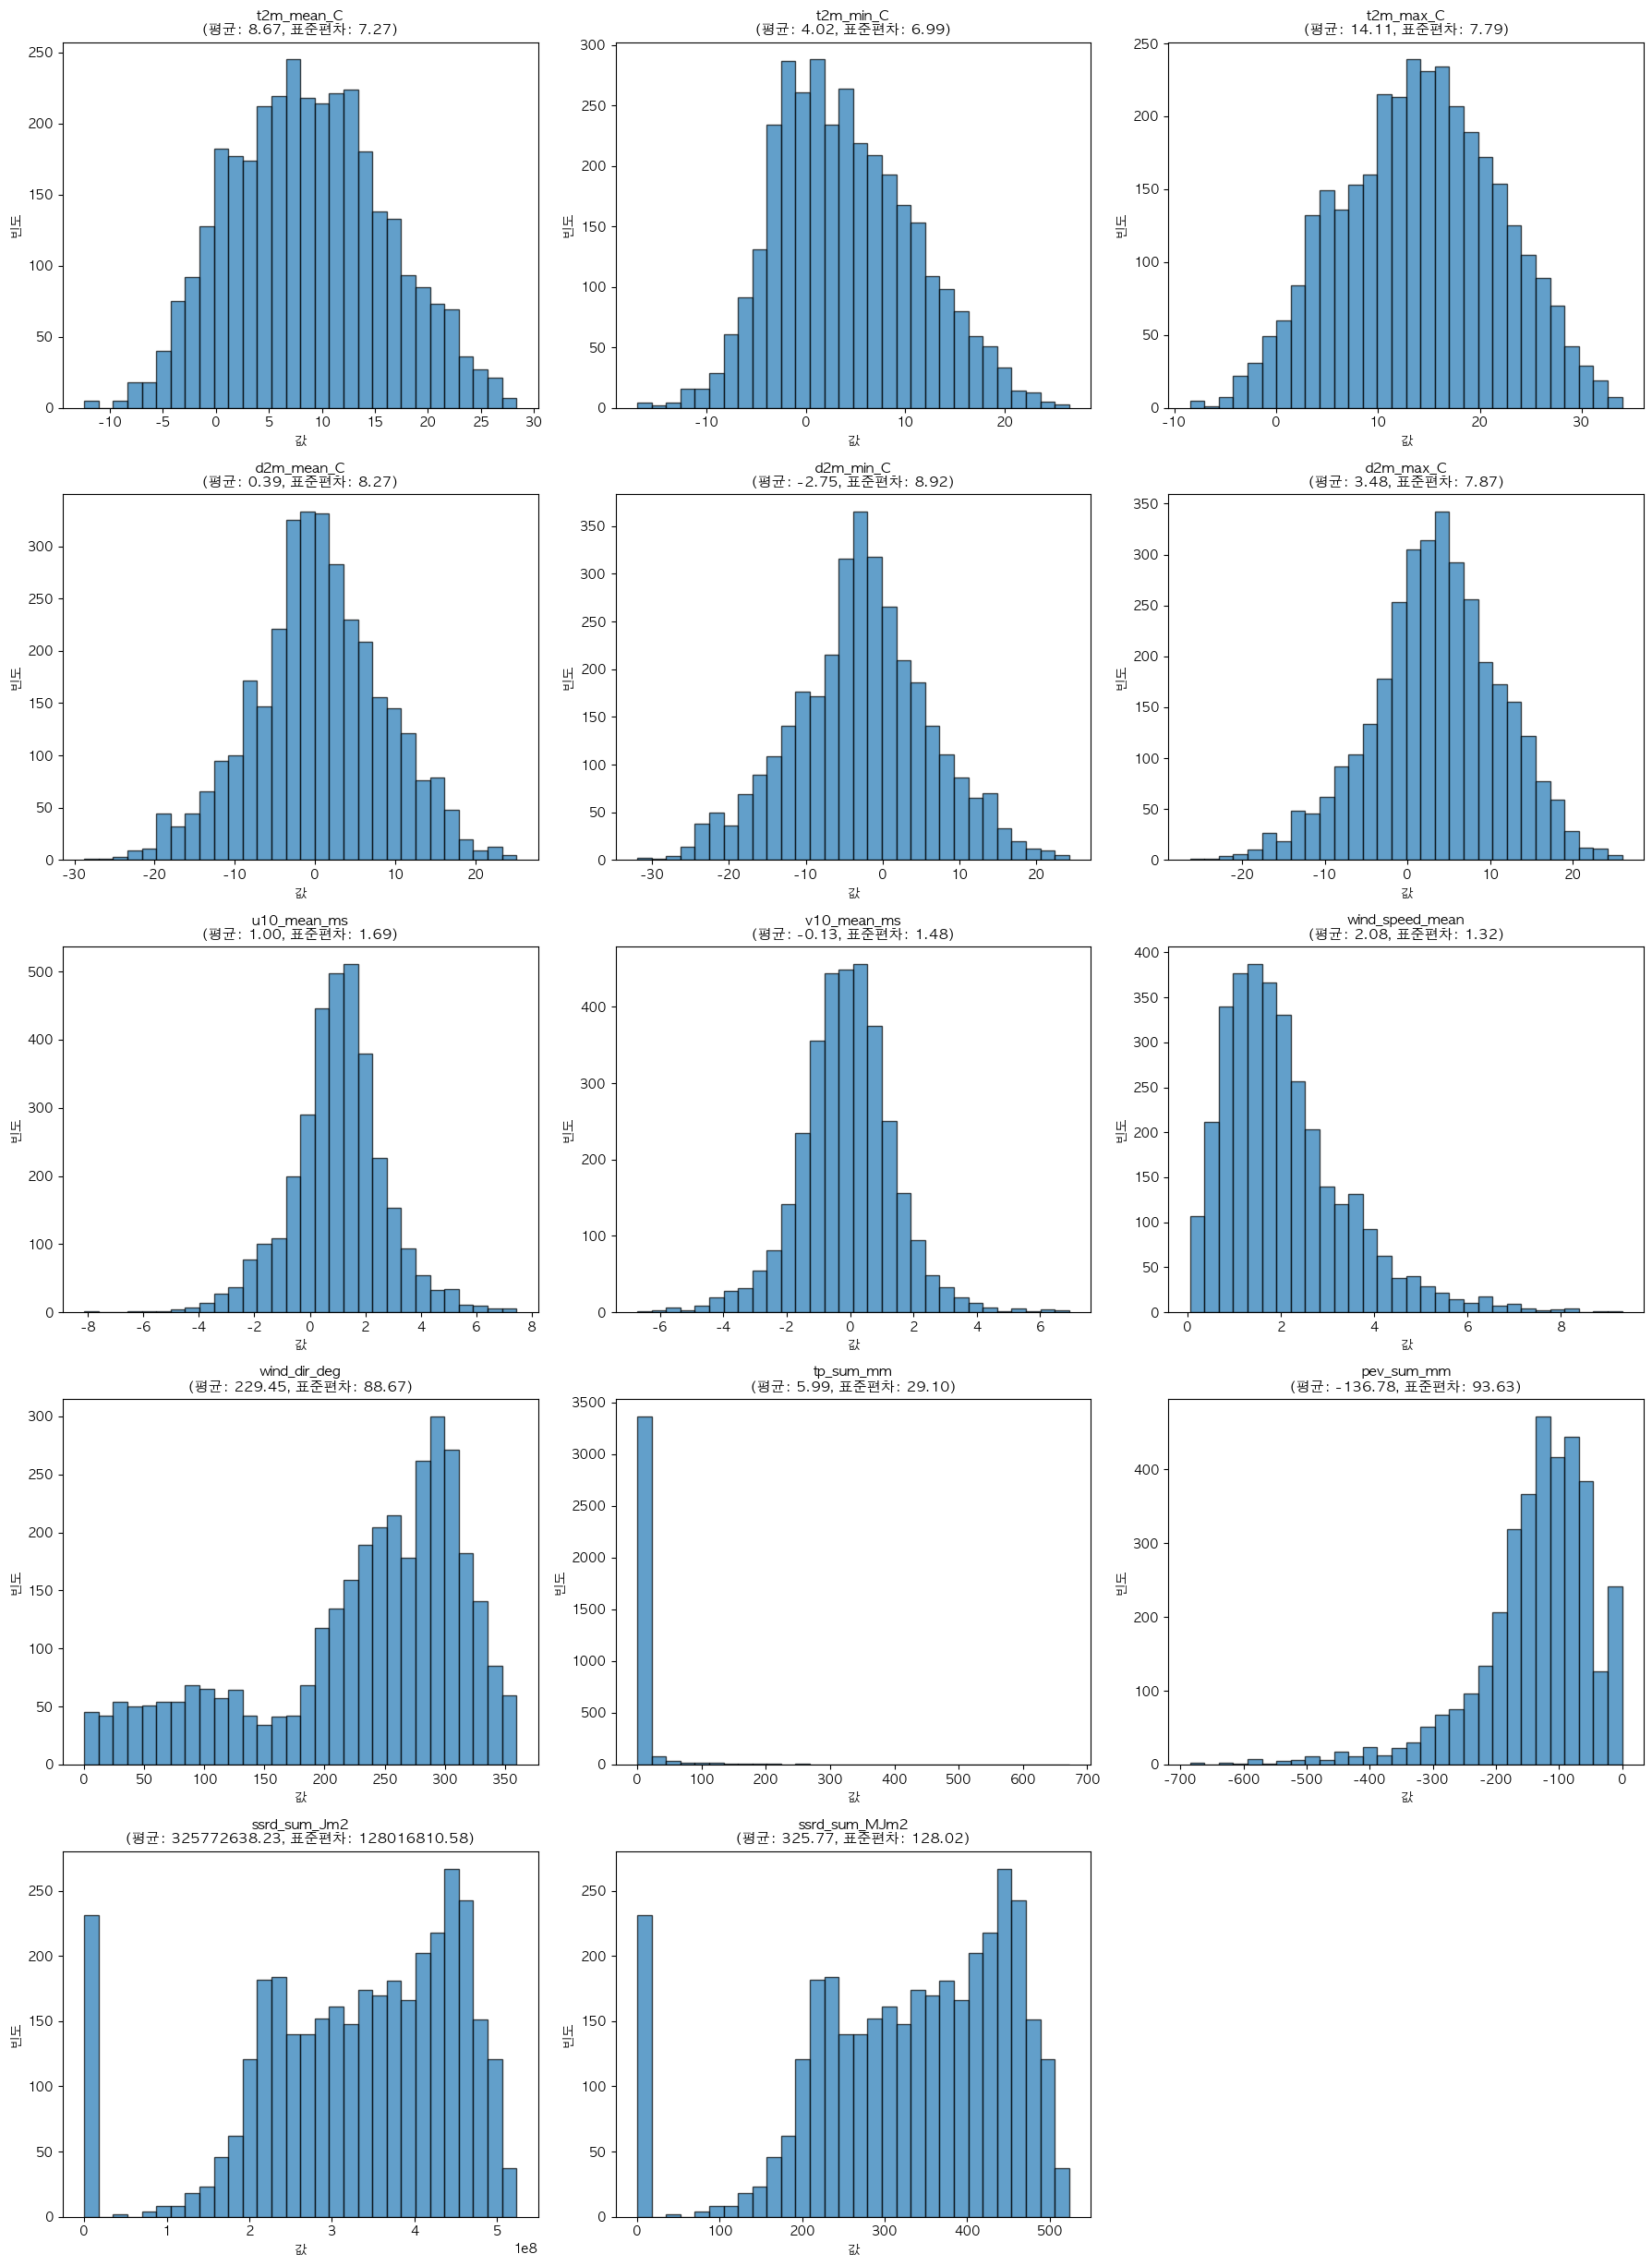

In [32]:
# ... existing code ...

# 분석할 기상 데이터 컬럼들
weather_cols = ['t2m_mean_C', 't2m_min_C', 't2m_max_C', 'd2m_mean_C', 'd2m_min_C', 'd2m_max_C',
                'u10_mean_ms', 'v10_mean_ms', 'wind_speed_mean', 'wind_dir_deg', 'tp_sum_mm', 
                'pev_sum_mm', 'ssrd_sum_Jm2', 'ssrd_sum_MJm2']

print("=== 기상 데이터 컬럼 분석 ===")

# 존재하는 컬럼만 필터링
existing_weather = [col for col in weather_cols if col in df.columns]
print(f"분석 대상 컬럼: {len(existing_weather)}개")

# 1. 기본 통계 정보
print("\n=== 기본 통계 정보 ===")
for col in existing_weather:
    print(f"\n{col}:")
    print(f"  평균: {df[col].mean():.2f}")
    print(f"  표준편차: {df[col].std():.2f}")
    print(f"  최소값: {df[col].min():.2f}")
    print(f"  최대값: {df[col].max():.2f}")
    print(f"  결측값: {df[col].isnull().sum()}개")

# 2. 분포 시각화 (히스토그램)
print(f"\n=== 분포 시각화 ===")

# subplot 크기 계산 (3열로 배치)
n_cols = 3
n_rows = (len(existing_weather) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
fig.suptitle(' ', fontsize=16, y=0.95)

# 1차원 배열인 경우 2차원으로 변환
if n_rows == 1:
    axes = axes.reshape(1, -1)

for i, col in enumerate(existing_weather):
    row = i // n_cols
    col_idx = i % n_cols
    
    # 히스토그램
    axes[row, col_idx].hist(df[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
    axes[row, col_idx].set_title(f'{col}', fontsize=12)
    axes[row, col_idx].set_xlabel('값')
    axes[row, col_idx].set_ylabel('빈도')
    
    # 평균과 표준편차를 제목에 추가
    mean_val = df[col].mean()
    std_val = df[col].std()
    axes[row, col_idx].set_title(f'{col}\n(평균: {mean_val:.2f}, 표준편차: {std_val:.2f})', fontsize=11)

# 빈 subplot 숨기기
for i in range(len(existing_weather), n_rows * n_cols):
    row = i // n_cols
    col_idx = i % n_cols
    axes[row, col_idx].set_visible(False)

plt.tight_layout()
plt.show()

# ... existing code ...

=== 시간 관련 컬럼 분석 ===
분석 대상 컬럼: 3개

=== 기본 통계 정보 ===

DSPT_REQ_HR:
  평균: 704.11
  표준편차: 640.66
  최소값: 0.00
  최대값: 16468.00
  결측값: 0개

arrival_time_diff:
  평균: 832.54
  표준편차: 2165.30
  최소값: 0.00
  최대값: 88071.00
  결측값: 0개

dispatch_time_diff:
  평균: 79.89
  표준편차: 122.88
  최소값: 0.00
  최대값: 5798.00
  결측값: 0개

=== 분포 시각화 ===


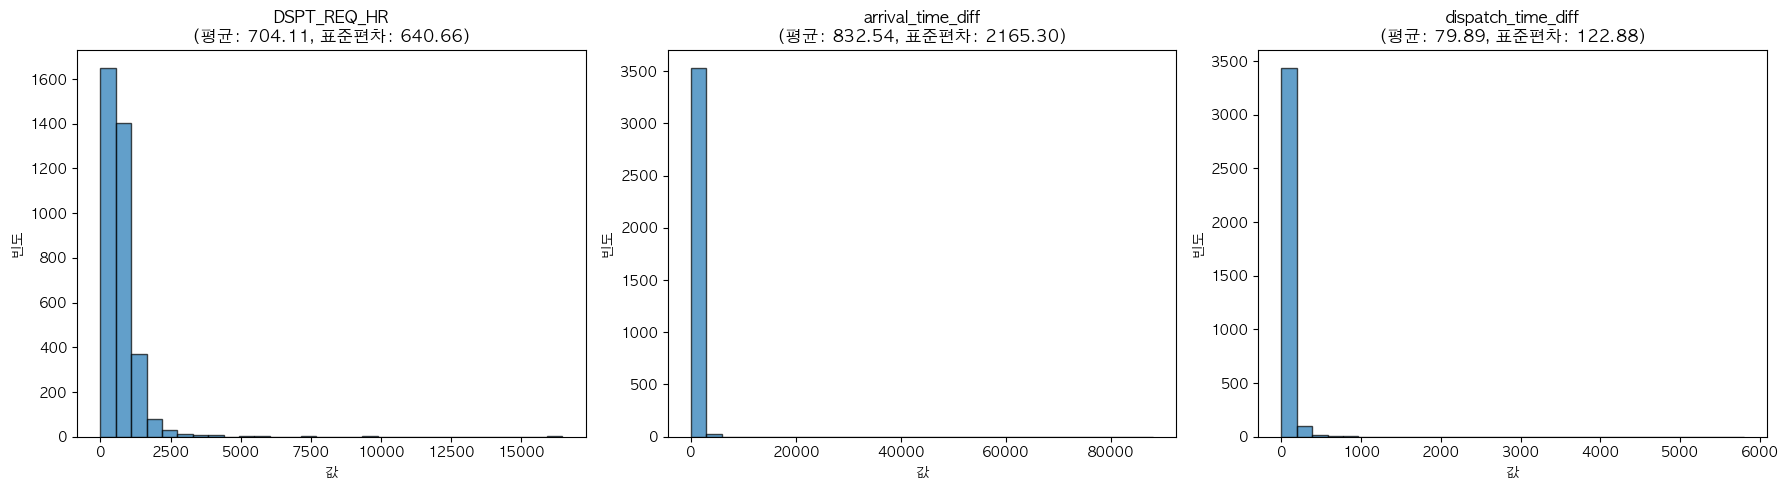


=== 박스플롯 (이상치 확인) ===


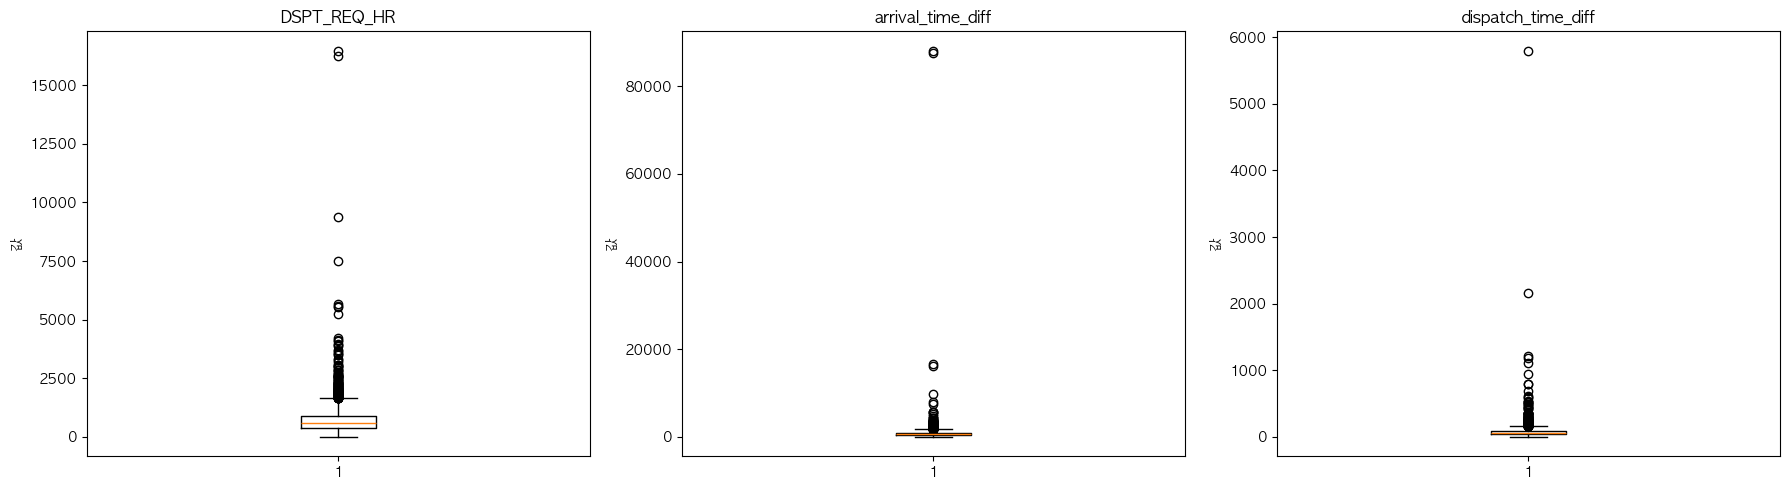

In [33]:
# ... existing code ...

# 분석할 컬럼들
time_cols = ['DSPT_REQ_HR', 'arrival_time_diff', 'dispatch_time_diff']

print("=== 시간 관련 컬럼 분석 ===")

# 존재하는 컬럼만 필터링
existing_time = [col for col in time_cols if col in df.columns]
print(f"분석 대상 컬럼: {len(existing_time)}개")

# 1. 기본 통계 정보
print("\n=== 기본 통계 정보 ===")
for col in existing_time:
    print(f"\n{col}:")
    print(f"  평균: {df[col].mean():.2f}")
    print(f"  표준편차: {df[col].std():.2f}")
    print(f"  최소값: {df[col].min():.2f}")
    print(f"  최대값: {df[col].max():.2f}")
    print(f"  결측값: {df[col].isnull().sum()}개")

# 2. 분포 시각화 (히스토그램)
print(f"\n=== 분포 시각화 ===")

fig, axes = plt.subplots(1, len(existing_time), figsize=(6*len(existing_time), 5))
if len(existing_time) == 1:
    axes = [axes]

for i, col in enumerate(existing_time):
    # 히스토그램
    axes[i].hist(df[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
    
    # 평균과 표준편차를 제목에 추가
    mean_val = df[col].mean()
    std_val = df[col].std()
    axes[i].set_title(f'{col}\n(평균: {mean_val:.2f}, 표준편차: {std_val:.2f})', fontsize=12)
    axes[i].set_xlabel('값')
    axes[i].set_ylabel('빈도')

plt.tight_layout()
plt.show()

# 3. 박스플롯으로 이상치 확인
print(f"\n=== 박스플롯 (이상치 확인) ===")

fig, axes = plt.subplots(1, len(existing_time), figsize=(6*len(existing_time), 5))
if len(existing_time) == 1:
    axes = [axes]

for i, col in enumerate(existing_time):
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].set_ylabel('값')

plt.tight_layout()
plt.show()

# ... existing code ...

=== 로그화된 시간 관련 컬럼 분석 ===
DSPT_REQ_HR: 0보다 큰 값 3559개, 로그화 완료
arrival_time_diff: 0보다 큰 값 3559개, 로그화 완료
dispatch_time_diff: 0보다 큰 값 3426개, 로그화 완료

로그화된 컬럼: ['DSPT_REQ_HR_LOG', 'arrival_time_diff_LOG', 'dispatch_time_diff_LOG']

=== 로그화된 데이터 기본 통계 ===

DSPT_REQ_HR_LOG:
  평균: 6.3507
  표준편차: 0.6228
  최소값: 3.9120
  최대값: 9.7092
  결측값: 1개

arrival_time_diff_LOG:
  평균: 6.4948
  표준편차: 0.5695
  최소값: 4.0943
  최대값: 11.3859
  결측값: 1개

dispatch_time_diff_LOG:
  평균: 4.2055
  표준편차: 0.6063
  최소값: 0.0000
  최대값: 8.6653
  결측값: 134개

=== 로그화된 데이터 분포 시각화 ===


/opt/anaconda3/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


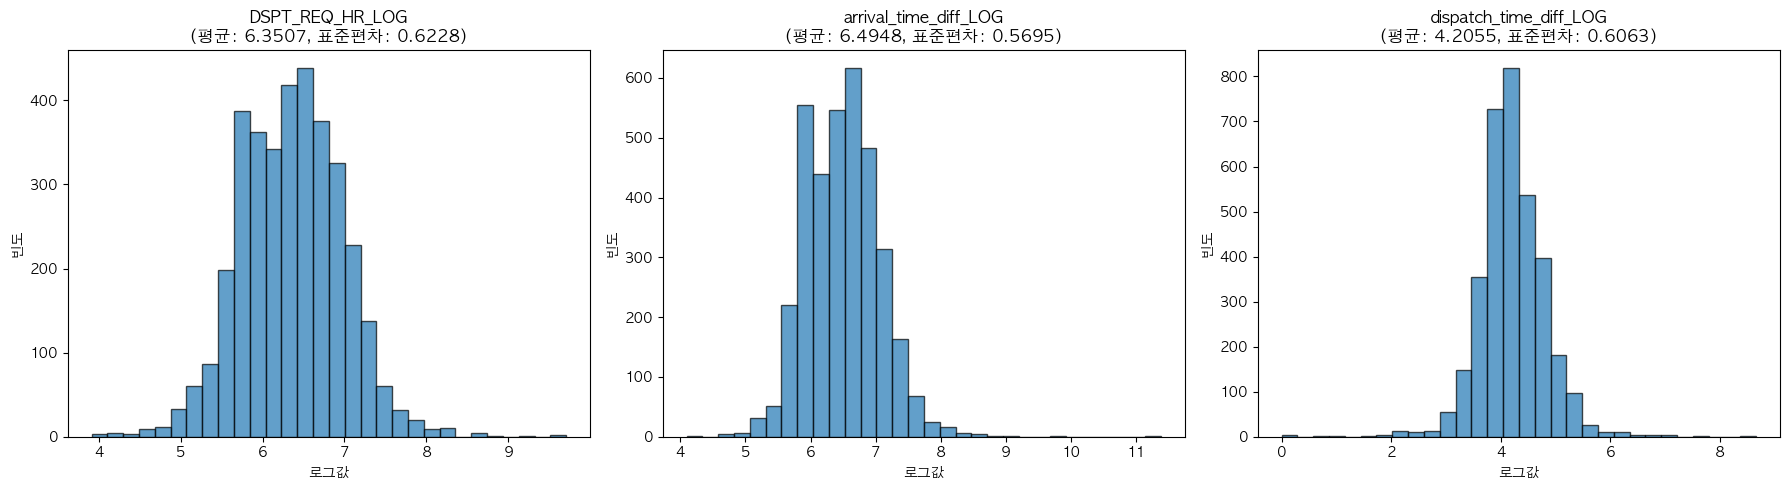


=== 원본 vs 로그화된 데이터 비교 ===


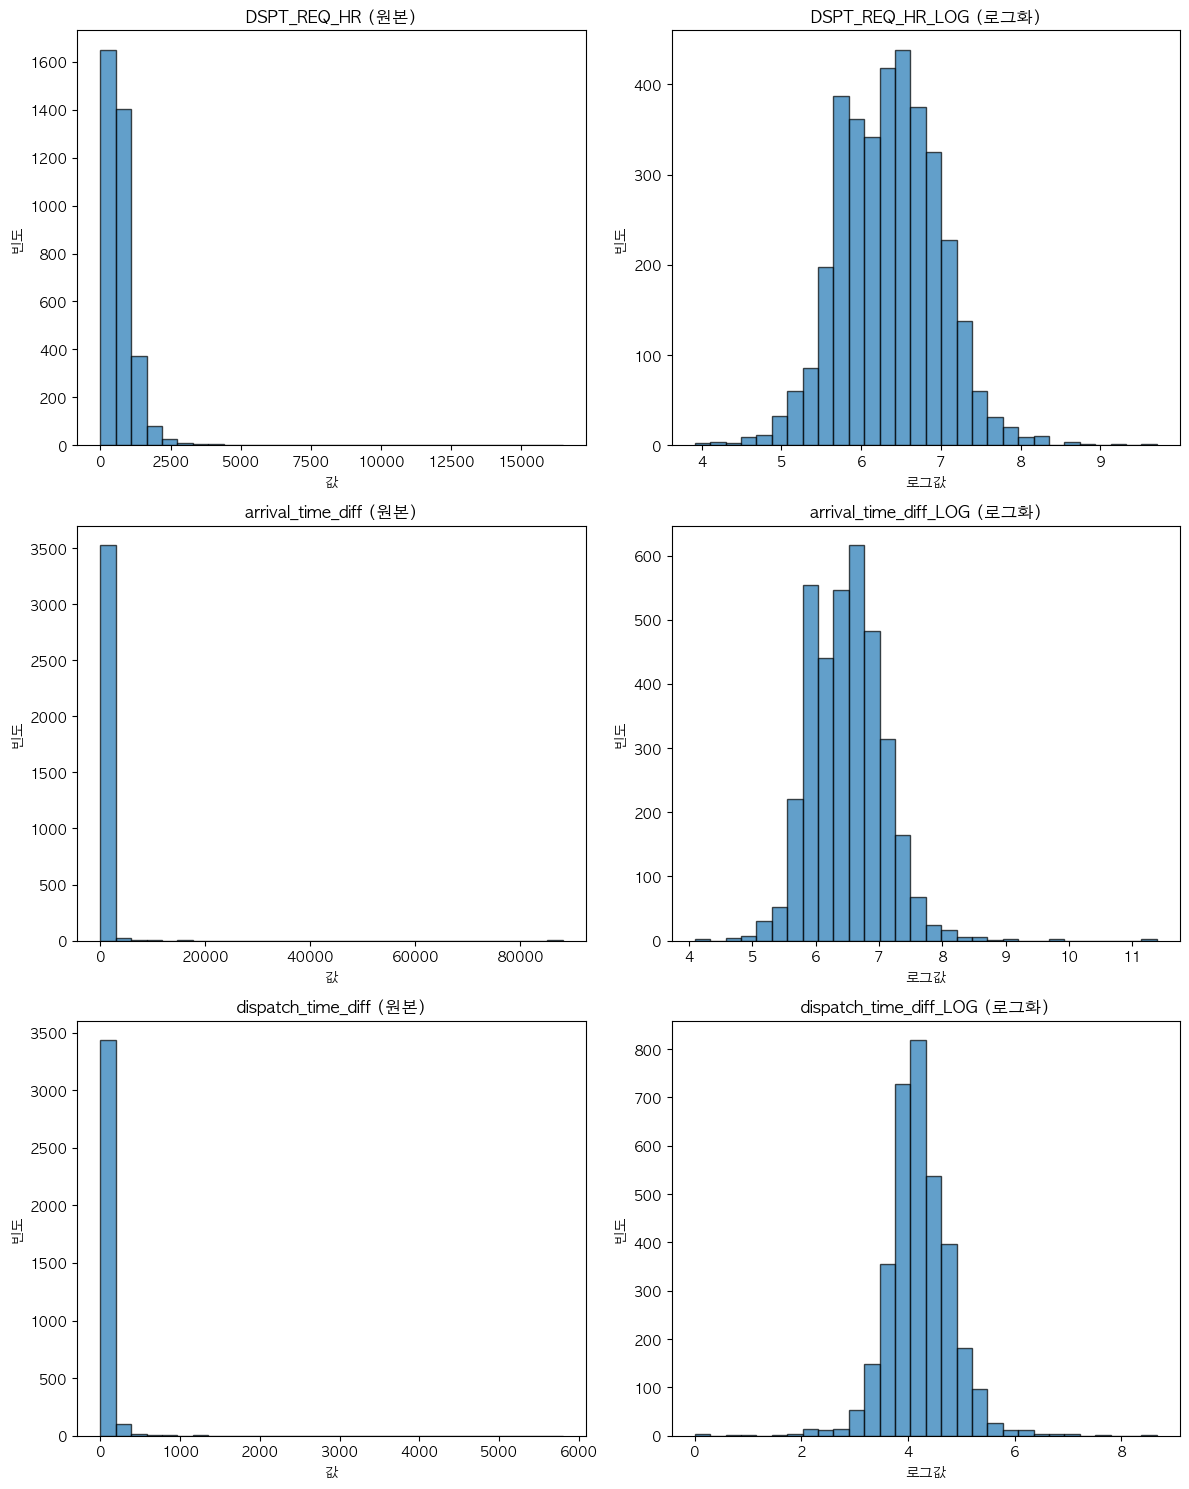

In [34]:
# ... existing code ...

# 로그화할 컬럼들
time_cols = ['DSPT_REQ_HR', 'arrival_time_diff', 'dispatch_time_diff']

print("=== 로그화된 시간 관련 컬럼 분석 ===")

# 1. 로그화된 새로운 객체 생성 (0보다 큰 값만 선택)
df_log_time = df[time_cols].copy()

# 각 컬럼을 로그화 (0보다 큰 값만)
for col in time_cols:
    if col in df.columns:
        # 0보다 큰 값만 선택하고 로그화
        mask = df[col] > 0
        df_log_time[f'{col}_LOG'] = np.where(mask, np.log(df[col]), np.nan)
        
        print(f"{col}: 0보다 큰 값 {mask.sum()}개, 로그화 완료")
    else:
        print(f"{col}: 컬럼에 존재하지 않음")

# 로그화된 컬럼들만 선택
log_cols = [col for col in df_log_time.columns if col.endswith('_LOG')]
print(f"\n로그화된 컬럼: {log_cols}")

# 2. 로그화된 데이터의 기본 통계 정보
print("\n=== 로그화된 데이터 기본 통계 ===")
for col in log_cols:
    print(f"\n{col}:")
    print(f"  평균: {df_log_time[col].mean():.4f}")
    print(f"  표준편차: {df_log_time[col].std():.4f}")
    print(f"  최소값: {df_log_time[col].min():.4f}")
    print(f"  최대값: {df_log_time[col].max():.4f}")
    print(f"  결측값: {df_log_time[col].isnull().sum()}개")

# 3. 로그화된 데이터의 분포 시각화 (히스토그램)
print(f"\n=== 로그화된 데이터 분포 시각화 ===")

fig, axes = plt.subplots(1, len(log_cols), figsize=(6*len(log_cols), 5))
if len(log_cols) == 1:
    axes = [axes]

for i, col in enumerate(log_cols):
    # 히스토그램
    axes[i].hist(df_log_time[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
    
    # 평균과 표준편차를 제목에 추가
    mean_val = df_log_time[col].mean()
    std_val = df_log_time[col].std()
    axes[i].set_title(f'{col}\n(평균: {mean_val:.4f}, 표준편차: {std_val:.4f})', fontsize=12)
    axes[i].set_xlabel('로그값')
    axes[i].set_ylabel('빈도')

plt.tight_layout()
plt.show()

# 4. 원본 vs 로그화된 데이터 비교
print(f"\n=== 원본 vs 로그화된 데이터 비교 ===")

fig, axes = plt.subplots(len(log_cols), 2, figsize=(12, 5*len(log_cols)))
if len(log_cols) == 1:
    axes = axes.reshape(1, -1)

for i, log_col in enumerate(log_cols):
    original_col = log_col.replace('_LOG', '')
    
    # 원본 데이터 히스토그램
    axes[i, 0].hist(df[original_col].dropna(), bins=30, alpha=0.7, edgecolor='black')
    axes[i, 0].set_title(f'{original_col} (원본)', fontsize=12)
    axes[i, 0].set_xlabel('값')
    axes[i, 0].set_ylabel('빈도')
    
    # 로그화된 데이터 히스토그램
    axes[i, 1].hist(df_log_time[log_col].dropna(), bins=30, alpha=0.7, edgecolor='black')
    axes[i, 1].set_title(f'{log_col} (로그화)', fontsize=12)
    axes[i, 1].set_xlabel('로그값')
    axes[i, 1].set_ylabel('빈도')

plt.tight_layout()
plt.show()

# ... existing code ...

=== 컬럼 분포 분석 ===
분석 대상 컬럼: 3개

=== 기본 통계 정보 ===

golden_time_under_50min:
  데이터 타입: int64
  고유값: 2개
  결측값: 0개
  값 분포:
golden_time_under_50min
0      25
1    3535
Name: count, dtype: int64

is_night:
  데이터 타입: int64
  고유값: 2개
  결측값: 0개
  값 분포:
is_night
0    3121
1     439
Name: count, dtype: int64

month:
  데이터 타입: int32
  고유값: 12개
  결측값: 0개
  값 분포:
month
1     367
2     510
3     809
4     837
5     353
6     122
7      45
8      16
9      31
10    106
11    179
12    185
Name: count, dtype: int64

=== 분포 시각화 ===


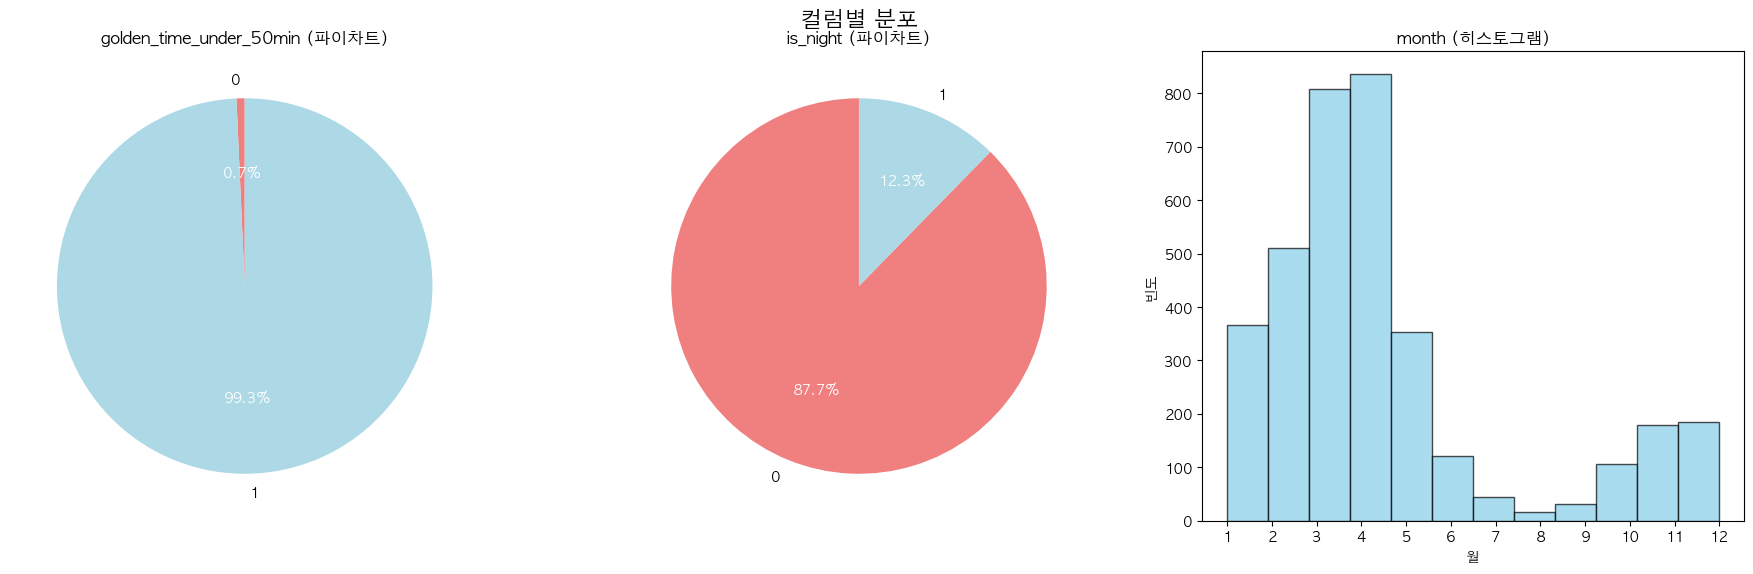


=== 상세 분포 정보 ===

golden_time_under_50min:
값별 분포:
  0: 25개 (0.7%)
  1: 3535개 (99.3%)

is_night:
값별 분포:
  0: 3121개 (87.7%)
  1: 439개 (12.3%)

month:
월별 분포:
  1월: 367개 (10.3%)
  2월: 510개 (14.3%)
  3월: 809개 (22.7%)
  4월: 837개 (23.5%)
  5월: 353개 (9.9%)
  6월: 122개 (3.4%)
  7월: 45개 (1.3%)
  8월: 16개 (0.4%)
  9월: 31개 (0.9%)
  10월: 106개 (3.0%)
  11월: 179개 (5.0%)
  12월: 185개 (5.2%)


In [35]:
# ... existing code ...

# 분석할 컬럼들
analysis_cols = ['golden_time_under_50min', 'is_night', 'month']

print("=== 컬럼 분포 분석 ===")

# 존재하는 컬럼만 필터링
existing_cols = [col for col in analysis_cols if col in df.columns]
print(f"분석 대상 컬럼: {len(existing_cols)}개")

# 1. 기본 통계 정보
print("\n=== 기본 통계 정보 ===")
for col in existing_cols:
    print(f"\n{col}:")
    print(f"  데이터 타입: {df[col].dtype}")
    print(f"  고유값: {df[col].nunique()}개")
    print(f"  결측값: {df[col].isnull().sum()}개")
    print(f"  값 분포:")
    print(df[col].value_counts().sort_index())

# 2. 시각화
print(f"\n=== 분포 시각화 ===")

# subplot 생성 (1행 3열)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('컬럼별 분포', fontsize=16, y=0.95)

for i, col in enumerate(existing_cols):
    if col == 'month':
        # month는 히스토그램
        axes[i].hist(df[col].dropna(), bins=12, alpha=0.7, edgecolor='black', color='skyblue')
        axes[i].set_title(f'{col} (히스토그램)', fontsize=12)
        axes[i].set_xlabel('월')
        axes[i].set_ylabel('빈도')
        axes[i].set_xticks(range(1, 13))
    else:
        # 나머지는 파이차트
        value_counts = df[col].value_counts().sort_index()
        colors = ['lightcoral', 'lightblue'] if len(value_counts) == 2 else plt.cm.Set3.colors
        
        wedges, texts, autotexts = axes[i].pie(value_counts.values, 
                                               labels=value_counts.index, 
                                               autopct='%1.1f%%',
                                               startangle=90,
                                               colors=colors[:len(value_counts)])
        axes[i].set_title(f'{col} (파이차트)', fontsize=12)
        
        # 텍스트 가독성 향상
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

# 3. 상세한 분포 정보
print(f"\n=== 상세 분포 정보 ===")
for col in existing_cols:
    print(f"\n{col}:")
    if col == 'month':
        month_counts = df[col].value_counts().sort_index()
        print("월별 분포:")
        for month, count in month_counts.items():
            percentage = (count / len(df)) * 100
            print(f"  {month}월: {count}개 ({percentage:.1f}%)")
    else:
        value_counts = df[col].value_counts().sort_index()
        print("값별 분포:")
        for value, count in value_counts.items():
            percentage = (count / len(df)) * 100
            print(f"  {value}: {count}개 ({percentage:.1f}%)")

# ... existing code ...

=== CTPV_NM 컬럼 분석 ===
데이터 타입: object
고유값 개수: 17
결측값 개수: 0
총 행 수: 3560

값별 분포:
  경기도: 876개 (24.6%)
  경상북도: 496개 (13.9%)
  강원특별자치도: 356개 (10.0%)
  경상남도: 346개 (9.7%)
  충청남도: 336개 (9.4%)
  전라남도: 275개 (7.7%)
  전북특별자치도: 195개 (5.5%)
  충청북도: 144개 (4.0%)
  울산광역시: 105개 (2.9%)
  부산광역시: 100개 (2.8%)
  대구광역시: 77개 (2.2%)
  서울특별시: 75개 (2.1%)
  인천광역시: 74개 (2.1%)
  세종특별자치시: 36개 (1.0%)
  광주광역시: 32개 (0.9%)
  대전광역시: 29개 (0.8%)
  제주특별자치도: 8개 (0.2%)


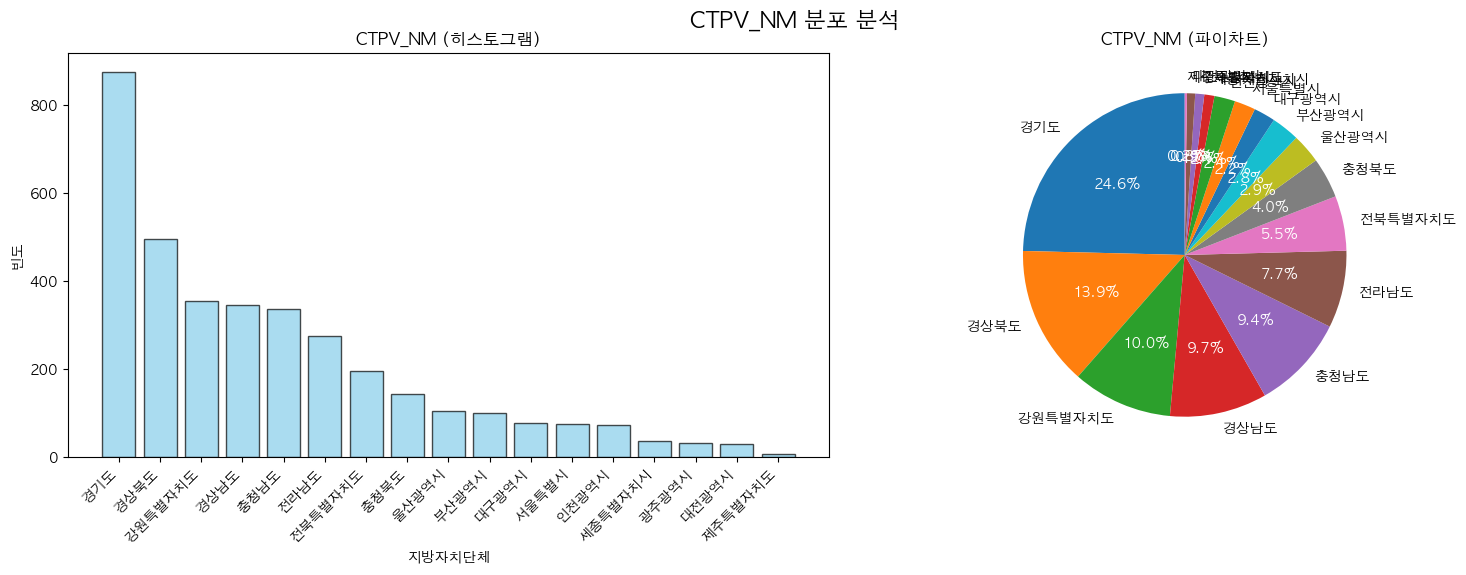

In [36]:
# ... existing code ...

# CTPV_NM 컬럼 분석
col_name = 'CTPV_NM'

print(f"=== {col_name} 컬럼 분석 ===")

# 기본 정보 확인
if col_name in df.columns:
    print(f"데이터 타입: {df[col_name].dtype}")
    print(f"고유값 개수: {df[col_name].nunique()}")
    print(f"결측값 개수: {df[col_name].isnull().sum()}")
    print(f"총 행 수: {len(df)}")
    
    # 값 분포 확인
    value_counts = df[col_name].value_counts()
    print(f"\n값별 분포:")
    for value, count in value_counts.items():
        percentage = (count / len(df)) * 100
        print(f"  {value}: {count}개 ({percentage:.1f}%)")
    
    # 시각화
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'{col_name} 분포 분석', fontsize=16, y=0.95)
    
    # 1. 히스토그램
    ax1.bar(range(len(value_counts)), value_counts.values, alpha=0.7, color='skyblue', edgecolor='black')
    ax1.set_title(f'{col_name} (히스토그램)', fontsize=12)
    ax1.set_xlabel('지방자치단체')
    ax1.set_ylabel('빈도')
    ax1.set_xticks(range(len(value_counts)))
    ax1.set_xticklabels(value_counts.index, rotation=45, ha='right')
    
    # 2. 파이차트
    wedges, texts, autotexts = ax2.pie(value_counts.values, 
                                       labels=value_counts.index, 
                                       autopct='%1.1f%%',
                                       startangle=90)
    ax2.set_title(f'{col_name} (파이차트)', fontsize=12)
    
    # 텍스트 가독성 향상
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
    
    plt.tight_layout()
    plt.show()
    
else:
    print(f"{col_name} 컬럼이 df에 존재하지 않습니다.")

# ... existing code ...

=== 거리 관련 컬럼 분석 ===
분석 대상 컬럼: 2개

=== 기본 통계 정보 ===

FRSTN_GRNDS_DSTNC:
  데이터 타입: int64
  평균: 16.36
  표준편차: 11.89
  최소값: 0.00
  최대값: 99.00
  결측값: 0개
  고유값 개수: 79개

CNTR_GRNDS_DSTNC:
  데이터 타입: int64
  평균: 8.67
  표준편차: 7.26
  최소값: 0.00
  최대값: 74.00
  결측값: 0개
  고유값 개수: 51개

=== 분포 시각화 ===


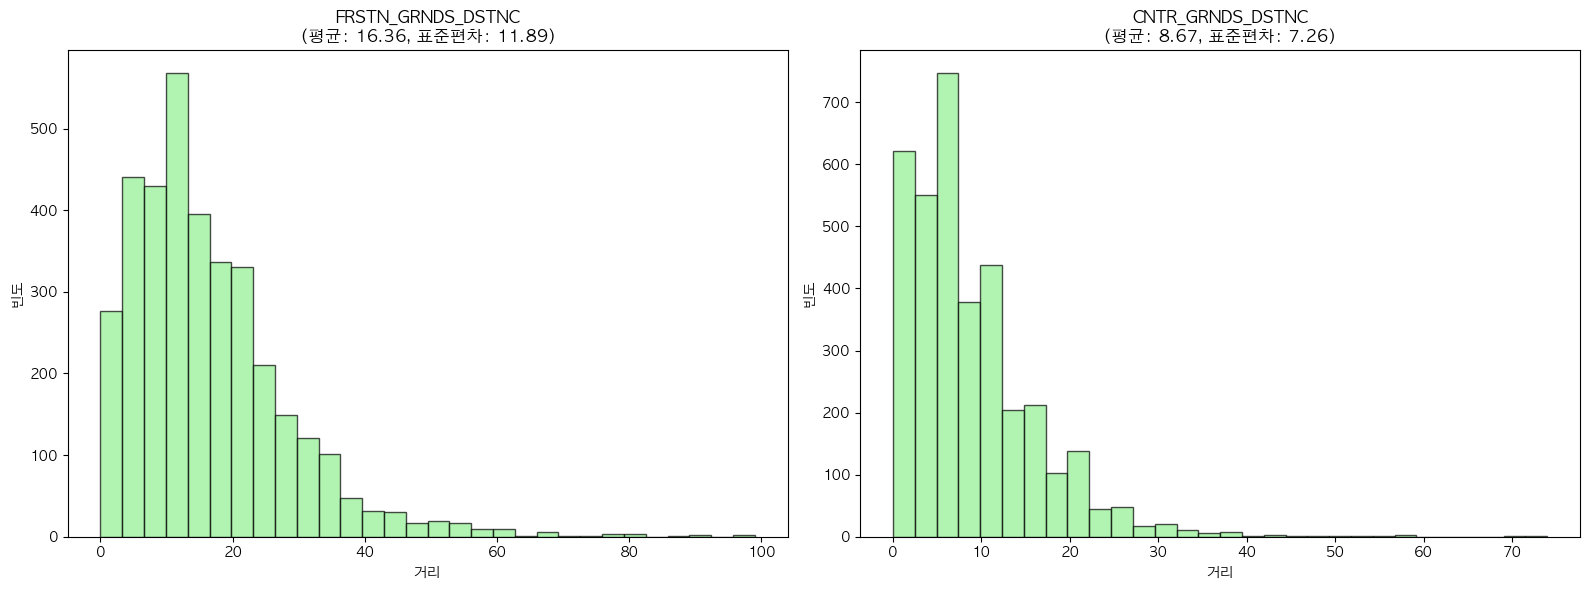


=== 박스플롯 (이상치 확인) ===


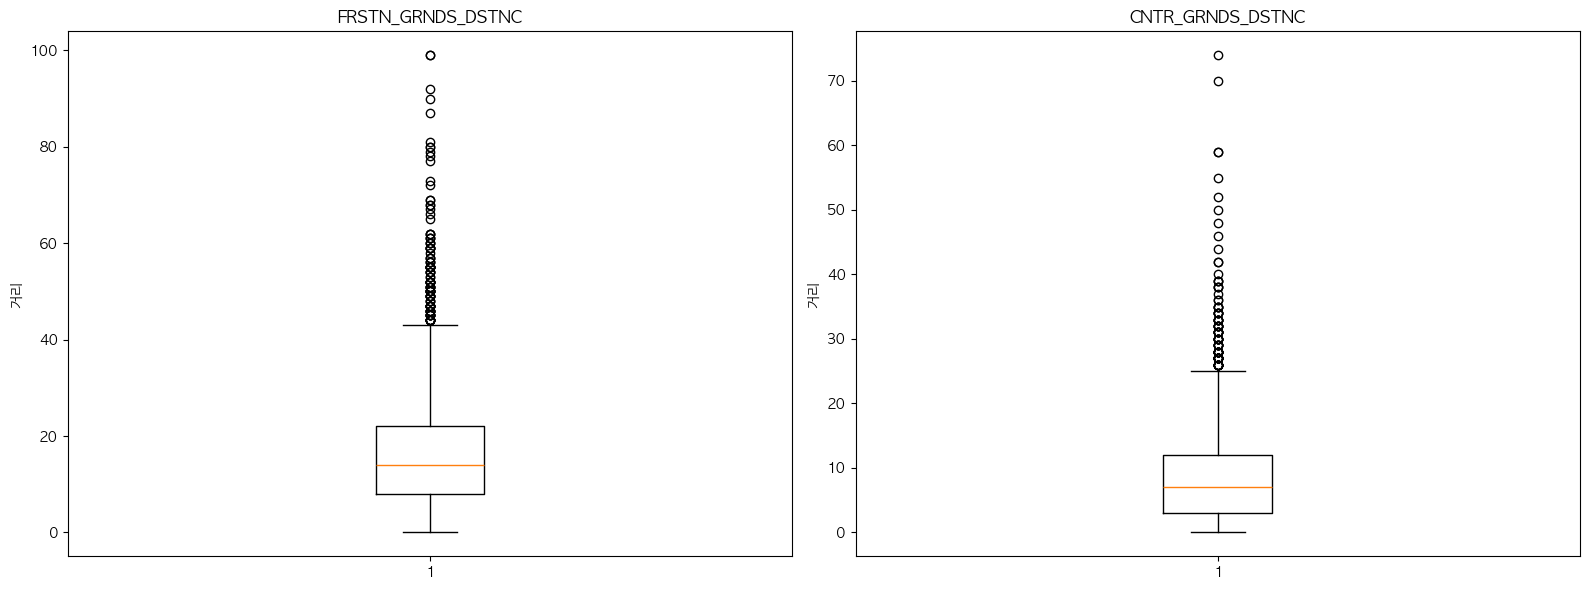


=== 값 분포 상세 정보 ===

FRSTN_GRNDS_DSTNC:
상위 10개 값:
  12: 175개 (4.9%)
  6: 152개 (4.3%)
  8: 148개 (4.2%)
  5: 147개 (4.1%)
  4: 142개 (4.0%)
  9: 141개 (4.0%)
  7: 141개 (4.0%)
  15: 137개 (3.8%)
  16: 136개 (3.8%)
  10: 133개 (3.7%)

CNTR_GRNDS_DSTNC:
상위 10개 값:
  5: 302개 (8.5%)
  2: 298개 (8.4%)
  3: 283개 (7.9%)
  4: 268개 (7.5%)
  6: 228개 (6.4%)
  8: 219개 (6.2%)
  7: 217개 (6.1%)
  1: 194개 (5.4%)
  10: 164개 (4.6%)
  9: 160개 (4.5%)


In [37]:
# ... existing code ...

# 분석할 컬럼들
distance_cols = ['FRSTN_GRNDS_DSTNC', 'CNTR_GRNDS_DSTNC']

print("=== 거리 관련 컬럼 분석 ===")

# 존재하는 컬럼만 필터링
existing_distance = [col for col in distance_cols if col in df.columns]
print(f"분석 대상 컬럼: {len(existing_distance)}개")

# 1. 기본 통계 정보
print("\n=== 기본 통계 정보 ===")
for col in existing_distance:
    print(f"\n{col}:")
    print(f"  데이터 타입: {df[col].dtype}")
    print(f"  평균: {df[col].mean():.2f}")
    print(f"  표준편차: {df[col].std():.2f}")
    print(f"  최소값: {df[col].min():.2f}")
    print(f"  최대값: {df[col].max():.2f}")
    print(f"  결측값: {df[col].isnull().sum()}개")
    print(f"  고유값 개수: {df[col].nunique()}개")

# 2. 분포 시각화 (히스토그램)
print(f"\n=== 분포 시각화 ===")

fig, axes = plt.subplots(1, len(existing_distance), figsize=(8*len(existing_distance), 6))
if len(existing_distance) == 1:
    axes = [axes]

for i, col in enumerate(existing_distance):
    # 히스토그램
    axes[i].hist(df[col].dropna(), bins=30, alpha=0.7, edgecolor='black', color='lightgreen')
    
    # 평균과 표준편차를 제목에 추가
    mean_val = df[col].mean()
    std_val = df[col].std()
    axes[i].set_title(f'{col}\n(평균: {mean_val:.2f}, 표준편차: {std_val:.2f})', fontsize=12)
    axes[i].set_xlabel('거리')
    axes[i].set_ylabel('빈도')

plt.tight_layout()
plt.show()

# 3. 박스플롯으로 이상치 확인
print(f"\n=== 박스플롯 (이상치 확인) ===")

fig, axes = plt.subplots(1, len(existing_distance), figsize=(8*len(existing_distance), 6))
if len(existing_distance) == 1:
    axes = [axes]

for i, col in enumerate(existing_distance):
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].set_ylabel('거리')

plt.tight_layout()
plt.show()

# 4. 값 분포 상세 정보
print(f"\n=== 값 분포 상세 정보 ===")
for col in existing_distance:
    print(f"\n{col}:")
    value_counts = df[col].value_counts().head(10)  # 상위 10개 값만 표시
    print("상위 10개 값:")
    for value, count in value_counts.items():
        percentage = (count / len(df)) * 100
        print(f"  {value}: {count}개 ({percentage:.1f}%)")

# ... existing code ...

=== 로그화된 거리 관련 컬럼 분석 ===
FRSTN_GRNDS_DSTNC: 0보다 큰 값 3529개, 로그화 완료
CNTR_GRNDS_DSTNC: 0보다 큰 값 3430개, 로그화 완료

로그화된 컬럼: ['FRSTN_GRNDS_DSTNC_LOG', 'CNTR_GRNDS_DSTNC_LOG']

=== 로그화된 데이터 기본 통계 ===

FRSTN_GRNDS_DSTNC_LOG:
  평균: 2.5364
  표준편차: 0.7882
  최소값: 0.0000
  최대값: 4.5951
  결측값: 31개

CNTR_GRNDS_DSTNC_LOG:
  평균: 1.8808
  표준편차: 0.8443
  최소값: 0.0000
  최대값: 4.3041
  결측값: 130개

=== 로그화된 데이터 분포 시각화 ===


/opt/anaconda3/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


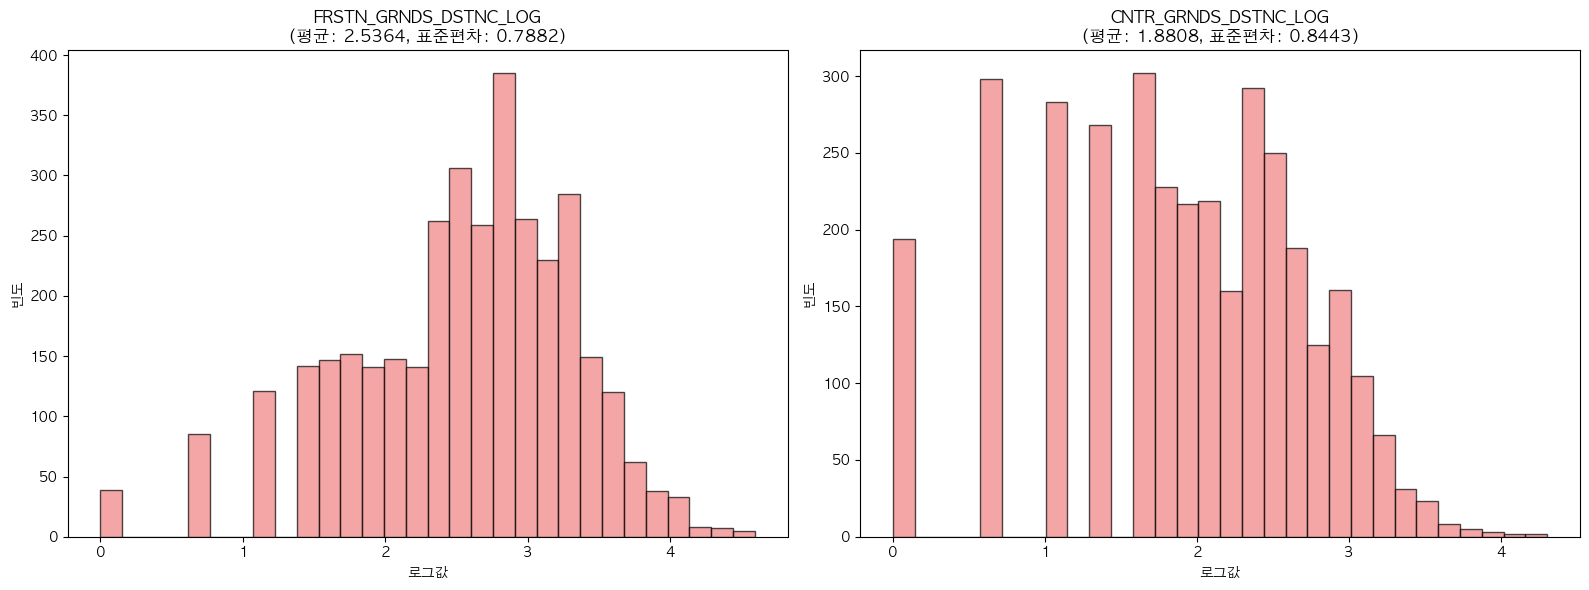


=== 원본 vs 로그화된 데이터 비교 ===


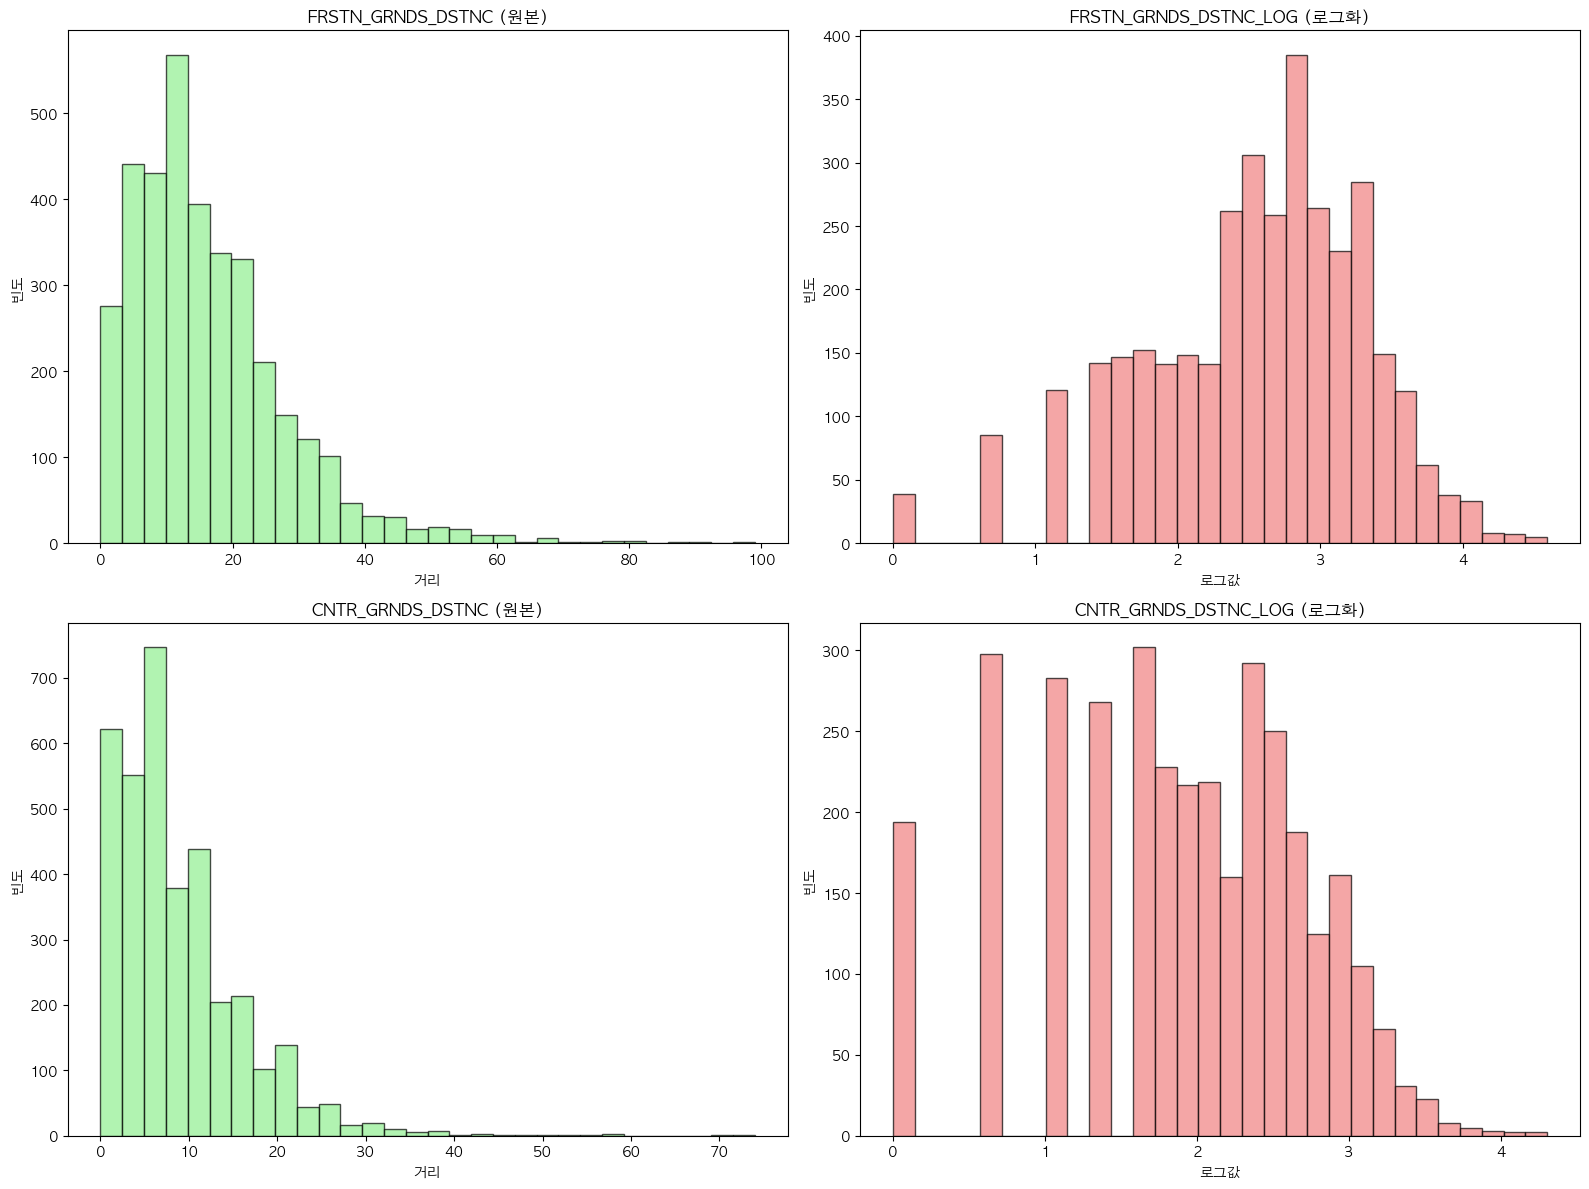


=== 로그화된 데이터 박스플롯 ===


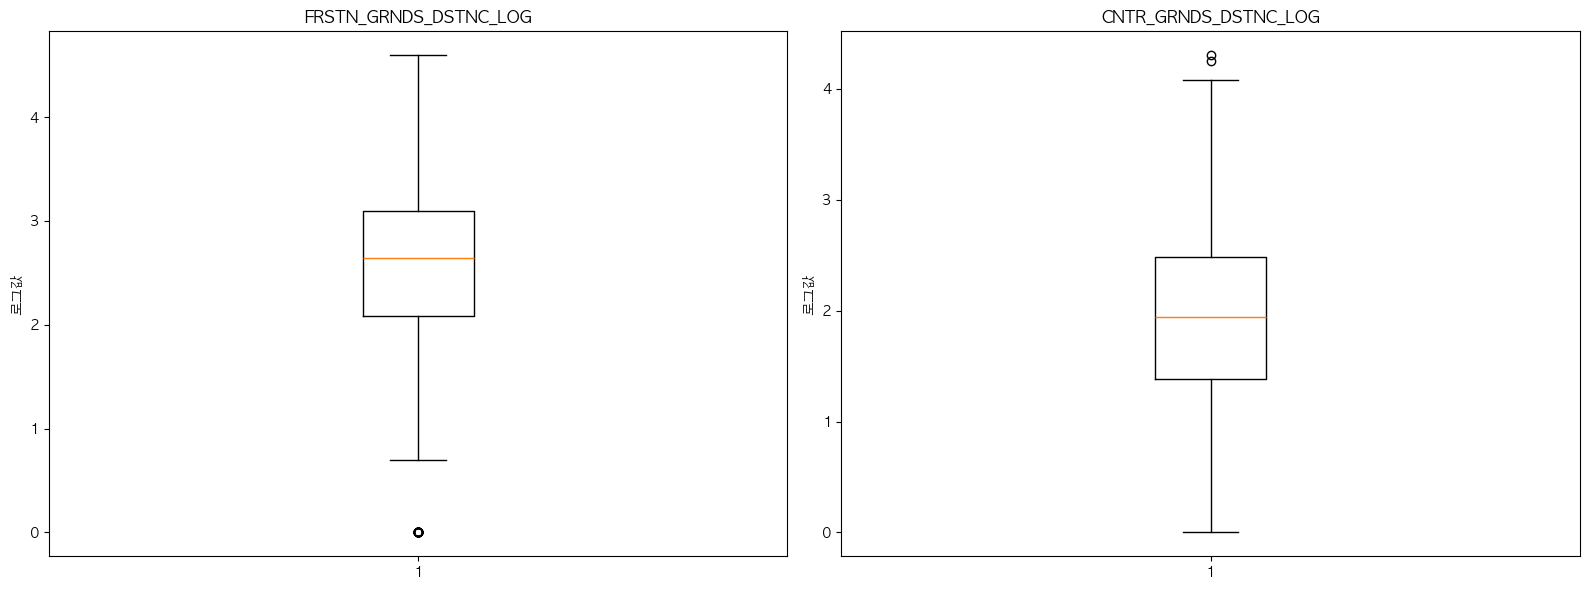

In [38]:
# ... existing code ...

# 로그화할 거리 관련 컬럼들
distance_cols = ['FRSTN_GRNDS_DSTNC', 'CNTR_GRNDS_DSTNC']

print("=== 로그화된 거리 관련 컬럼 분석 ===")

# 1. 로그화된 새로운 객체 생성 (0보다 큰 값만 선택)
df_log_dstnc = df[distance_cols].copy()

# 각 컬럼을 로그화 (0보다 큰 값만)
for col in distance_cols:
    if col in df.columns:
        # 0보다 큰 값만 선택하고 로그화
        mask = df[col] > 0
        df_log_dstnc[f'{col}_LOG'] = np.where(mask, np.log(df[col]), np.nan)
        
        print(f"{col}: 0보다 큰 값 {mask.sum()}개, 로그화 완료")
    else:
        print(f"{col}: 컬럼에 존재하지 않음")

# 로그화된 컬럼들만 선택
log_cols = [col for col in df_log_dstnc.columns if col.endswith('_LOG')]
print(f"\n로그화된 컬럼: {log_cols}")

# 2. 로그화된 데이터의 기본 통계 정보
print("\n=== 로그화된 데이터 기본 통계 ===")
for col in log_cols:
    print(f"\n{col}:")
    print(f"  평균: {df_log_dstnc[col].mean():.4f}")
    print(f"  표준편차: {df_log_dstnc[col].std():.4f}")
    print(f"  최소값: {df_log_dstnc[col].min():.4f}")
    print(f"  최대값: {df_log_dstnc[col].max():.4f}")
    print(f"  결측값: {df_log_dstnc[col].isnull().sum()}개")

# 3. 로그화된 데이터의 분포 시각화 (히스토그램)
print(f"\n=== 로그화된 데이터 분포 시각화 ===")

fig, axes = plt.subplots(1, len(log_cols), figsize=(8*len(log_cols), 6))
if len(log_cols) == 1:
    axes = [axes]

for i, col in enumerate(log_cols):
    # 히스토그램
    axes[i].hist(df_log_dstnc[col].dropna(), bins=30, alpha=0.7, edgecolor='black', color='lightcoral')
    
    # 평균과 표준편차를 제목에 추가
    mean_val = df_log_dstnc[col].mean()
    std_val = df_log_dstnc[col].std()
    axes[i].set_title(f'{col}\n(평균: {mean_val:.4f}, 표준편차: {std_val:.4f})', fontsize=12)
    axes[i].set_xlabel('로그값')
    axes[i].set_ylabel('빈도')

plt.tight_layout()
plt.show()

# 4. 원본 vs 로그화된 데이터 비교
print(f"\n=== 원본 vs 로그화된 데이터 비교 ===")

fig, axes = plt.subplots(len(log_cols), 2, figsize=(16, 6*len(log_cols)))
if len(log_cols) == 1:
    axes = axes.reshape(1, -1)

for i, log_col in enumerate(log_cols):
    original_col = log_col.replace('_LOG', '')
    
    # 원본 데이터 히스토그램
    axes[i, 0].hist(df[original_col].dropna(), bins=30, alpha=0.7, edgecolor='black', color='lightgreen')
    axes[i, 0].set_title(f'{original_col} (원본)', fontsize=12)
    axes[i, 0].set_xlabel('거리')
    axes[i, 0].set_ylabel('빈도')
    
    # 로그화된 데이터 히스토그램
    axes[i, 1].hist(df_log_dstnc[log_col].dropna(), bins=30, alpha=0.7, edgecolor='black', color='lightcoral')
    axes[i, 1].set_title(f'{log_col} (로그화)', fontsize=12)
    axes[i, 1].set_xlabel('로그값')
    axes[i, 1].set_ylabel('빈도')

plt.tight_layout()
plt.show()

# 5. 로그화된 데이터의 박스플롯
print(f"\n=== 로그화된 데이터 박스플롯 ===")

fig, axes = plt.subplots(1, len(log_cols), figsize=(8*len(log_cols), 6))
if len(log_cols) == 1:
    axes = [axes]

for i, col in enumerate(log_cols):
    axes[i].boxplot(df_log_dstnc[col].dropna())
    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].set_ylabel('로그값')

plt.tight_layout()
plt.show()

# ... existing code ...

=== 화재 관련 컬럼 분석 ===
분석 대상 컬럼: 2개

=== 기본 정보 ===

FND_FIRE_SE_NM:
  데이터 타입: object
  고유값 개수: 3
  결측값 개수: 0
  총 행 수: 3560

FND_IGTN_PSTN_NM:
  데이터 타입: object
  고유값 개수: 5
  결측값 개수: 0
  총 행 수: 3560

=== 파이차트 시각화 ===


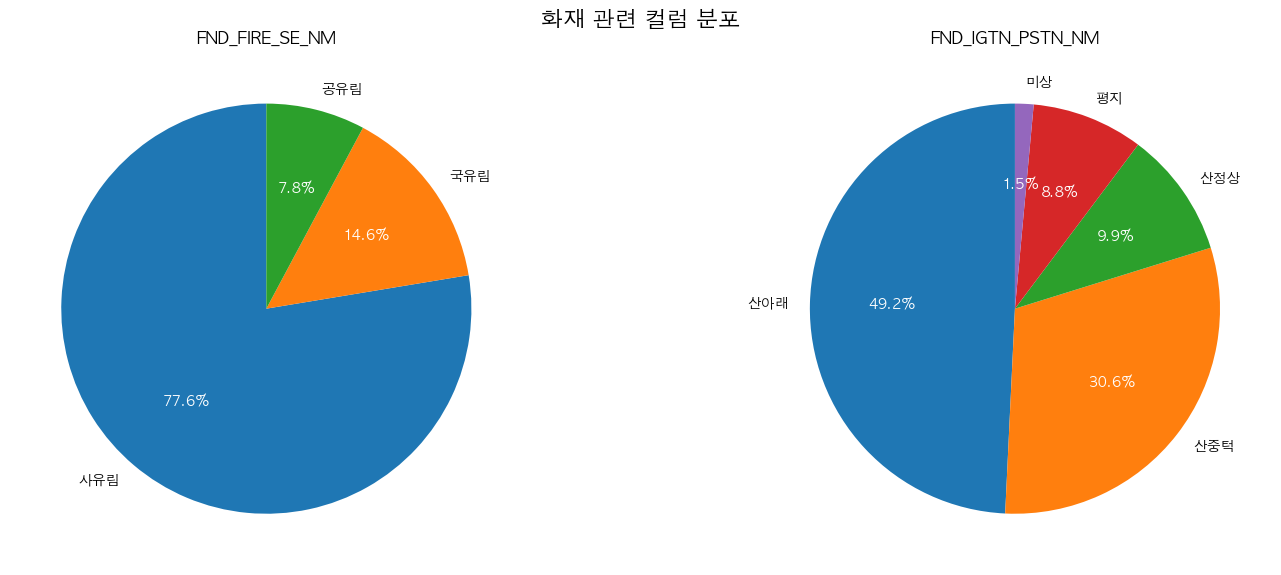


=== 상세 분포 정보 ===

FND_FIRE_SE_NM:
값별 분포:
  사유림: 2763개 (77.6%)
  국유림: 519개 (14.6%)
  공유림: 278개 (7.8%)

FND_IGTN_PSTN_NM:
값별 분포:
  산아래: 1753개 (49.2%)
  산중턱: 1088개 (30.6%)
  산정상: 354개 (9.9%)
  평지: 313개 (8.8%)
  미상: 52개 (1.5%)


In [39]:
# ... existing code ...

# 분석할 컬럼들
fire_cols = ['FND_FIRE_SE_NM', 'FND_IGTN_PSTN_NM']

print("=== 화재 관련 컬럼 분석 ===")

# 존재하는 컬럼만 필터링
existing_fire = [col for col in fire_cols if col in df.columns]
print(f"분석 대상 컬럼: {len(existing_fire)}개")

# 1. 기본 정보 확인
print("\n=== 기본 정보 ===")
for col in existing_fire:
    print(f"\n{col}:")
    print(f"  데이터 타입: {df[col].dtype}")
    print(f"  고유값 개수: {df[col].nunique()}")
    print(f"  결측값 개수: {df[col].isnull().sum()}")
    print(f"  총 행 수: {len(df)}")

# 2. 파이차트 시각화
print(f"\n=== 파이차트 시각화 ===")

fig, axes = plt.subplots(1, len(existing_fire), figsize=(8*len(existing_fire), 6))
fig.suptitle('화재 관련 컬럼 분포', fontsize=16, y=0.95)

if len(existing_fire) == 1:
    axes = [axes]

for i, col in enumerate(existing_fire):
    # 값 개수 계산
    value_counts = df[col].value_counts()
    
    # 파이차트
    wedges, texts, autotexts = axes[i].pie(value_counts.values, 
                                           labels=value_counts.index, 
                                           autopct='%1.1f%%',
                                           startangle=90)
    axes[i].set_title(f'{col}', fontsize=12)
    
    # 텍스트 가독성 향상
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

# 3. 상세한 분포 정보
print(f"\n=== 상세 분포 정보 ===")
for col in existing_fire:
    print(f"\n{col}:")
    value_counts = df[col].value_counts()
    print("값별 분포:")
    for value, count in value_counts.items():
        percentage = (count / len(df)) * 100
        print(f"  {value}: {count}개 ({percentage:.1f}%)")

# ... existing code ...